<a href="https://colab.research.google.com/github/deborahmasibo/Amazon-Product-Reviews-Sentiment-Analysis/blob/main/The_Bold_and_The_Beautiful.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

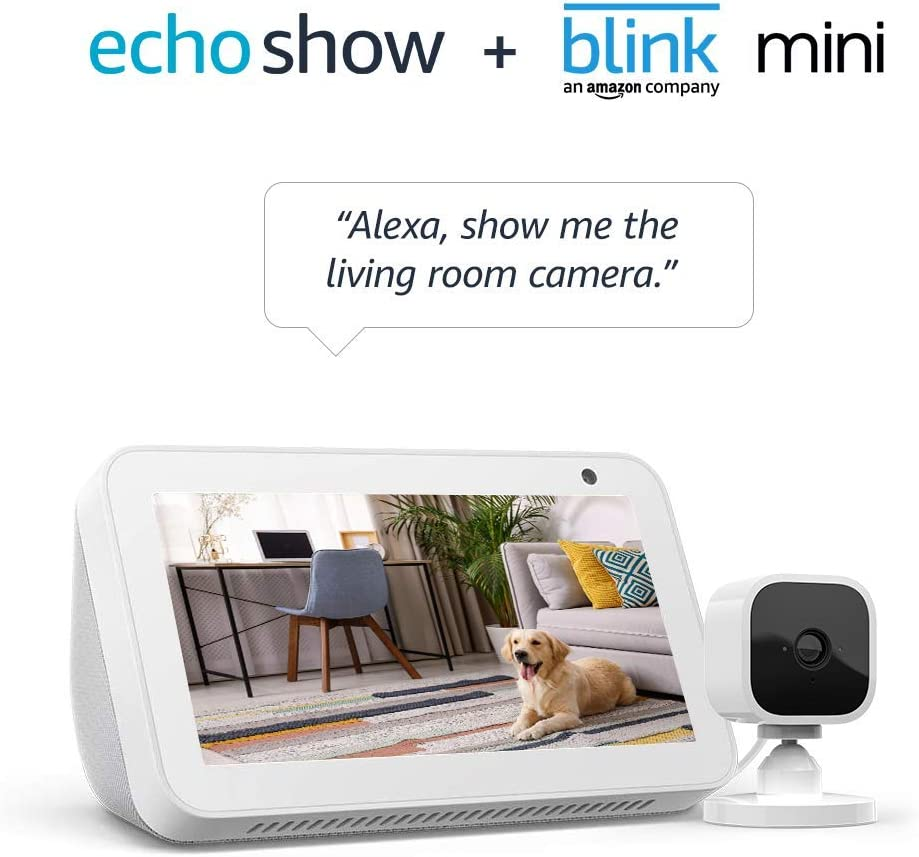

**PRODUCT REVIEW ANALYSIS**

 **a.)  Defining the Research Question**

To develop a Amazon product model that will rate the product ranks based on the  customers feedback.

**b.) Understanding the Context**

Amazon is a multinational e-commerce platform technology company based in America that specializes in  e-commerce, cloud computing, digital streaming, and artificial intelligence. Amazon is a vast internet-based company which offers a variety of products such as beauty, apparel, clothing, software, mobile appliances, electronics, groceries luggage, entertainment such as books, music, movies, home use and improvement goods among many other goods. Products in the beauty and apparel niche are widely bought by customers online, as it is a main preference for customers to buy these specific products through the online method using Amazon.com services. The company, which sells numerous products online, is the world’s largest online retailer, web service provider and cloud computing service whose headquarters are found in Seattle, Washington. It is one of the information technology Big Five companies along with Microsoft, Meta, Apple and Alphabet.Amazon is one of the world’s most valuable, leading brands in digital innovation.

The goods Amazon sells are sold either directly over the Internet or as the middleman between other retailers and its millions of customers. One of the company’s best products is Amazon customer reviews; which span over a period from 1995 till current, giving an overview of the customers’ expressions and opinions of their different experiences using products purchased over the Amazon.com website. These reviews are a viable source of information for use in the data science and machine learning fields for data scientists.Reviews in the beauty and apparel industry are available which can be made of use to conduct a thorough analysis to provide critical problem-solving as well as extract useful insights and make recommendations to the company.

**c.) Metrics of success**

Our study will be considered successful if we are able to meet the objectives below:

#General Objective

To recommend to Amazon the best products to stock in order to meet the customer's taste and needs.

#Specific Objectives

1.To identify and analyze customer opinion on available products.

2.To develop a system that seeks to forward customers feedback to the brand and predict customer sentiments.

3.To categorize the products’ reviews

Research questions

1.What are the customers/audience opinion on available products?

2.What are the most popular products and which brands’ customers are more likely to return?

3.What are the best products to stock in order to meet the customers' needs and taste?


**d.) Recording the Experimental Design**

1.Data Understanding

2. Data Relevance

3. Understand the context 

4. Metrics of success

4. Data Preparation

5. Perform Exploratory Data Analysis

6. Implementing the solution

7. Challenging the solution

8. Conclusion

9. Follow up questions


**e.) Data Relevance**

We shall be using the datasets below:


*   Reviews (https://nijianmo.github.io/amazon/index.html)
*   Product Metadata (https://nijianmo.github.io/amazon/index.html)
*   Ratings (https://nijianmo.github.io/amazon/index.html)

In [ ]:
# Redirect to google drive to help us not upload the datasets everytime we want to load our colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries

In [ ]:
# Used in data manipulation
import pandas as pd
# Provides objects for multidimension arrays
import numpy as np
# Provides  function for creating and removing a directory, fectching its contents ,changing and identifying the current directory.
import os
# Used in visualization
import matplotlib.pyplot as plt
# Used for data visualization and exploratory data analysis
import seaborn as sns
# Adds an entry into the specifications of the warning filter
from warnings import filterwarnings
filterwarnings('ignore')


In [ ]:
# Accessing working directory

os.chdir('/content/drive/Shared drives/Bold and beautiful')

In [ ]:
#import load_data.py to read data from file

import json_data
from json_data import data

In [ ]:
#import rating.py to read data from file

import csv_data
from csv_data import Data

# Dataset loading

## Amazon Fashion dataset loading

In [ ]:
# Reviews
fashion = data('AMAZON_FASHION_Reviews.json')

# Metadata
fashionm = data('meta_AMAZON_FASHION.json')

# Ratings
fashionr = Data('AMAZON_FASHION (1).csv')

## All Beauty dataset loading

In [ ]:
# Reviews
beauty = data('All_Beauty_Reviews.json')

# Metadata
beautym = data('meta_All_Beauty.json')

# Ratings
beautyr = Data('All_Beauty_Ratings.csv')

## Luxury Beauty data loading

In [ ]:
# Reviews
luxury = data('Luxury_Beauty_Reviews.json')

# Metadata
luxurym = data('meta_Luxury_Beauty.json')

# Ratings
luxuryr = Data('Luxury_Beauty_Ratings.csv')


# Data understanding

## Exploring our dataset


### Previewing details of Amazon fashion dataset

In [ ]:
# fashion reviews
fashion.print_results()

Loading the data...
Top part of the data...
   overall  verified   reviewTime      reviewerID        asin  reviewerName  \
0        5      True  10 20, 2014  A1D4G1SNUZWQOT  7106116521         Tracy   
1        2      True  09 28, 2014  A3DDWDH9PX2YX2  7106116521     Sonja Lau   
2        4     False  08 25, 2014  A2MWC41EW7XL15  7106116521      Kathleen   
3        2      True  08 24, 2014  A2UH2QQ275NV45  7106116521   Jodi Stoner   
4        3     False  07 27, 2014   A89F3LQADZBS5  7106116521  Alexander D.   

                                          reviewText  \
0                             Exactly what I needed.   
1  I agree with the other review, the opening is ...   
2  Love these... I am going to order another pack...   
3                                too tiny an opening   
4                                               Okay   

                                             summary  unixReviewTime  vote  \
0                             perfect replacements!!      14137632

In [ ]:
# fashion Metadata
fashionm.print_results()

Loading the data...
Top part of the data...
                                               title                   brand  \
0  Slime Time Fall Fest [With CDROM and Collector...   Group Publishing (CO)   
1  XCC Qi promise new spider snake preparing men'...                     NaN   
2                 Magical Things I Really Do Do Too!       Christopher Manos   
3                 Ashes to Ashes, Oranges to Oranges  Flickerlamp Publishing   
4  Aether & Empire #1 - 2016 First Printing Comic...                     NaN   

                                             feature  \
0  [Product Dimensions:\n                    \n8....   
1                                                NaN   
2  [Package Dimensions:\n                    \n8....   
3  [Package Dimensions:\n                    \n8....   
4  [Package Dimensions:\n                    \n10...   

                                     rank         date        asin  \
0  13,052,976inClothing,Shoesamp;Jewelry(  8.70 inches  0764443682  

In [ ]:
# Fashion Ratings
fashionr.print_results()

Loading the data...
Top part of the data...
         Item            User  Rating   Timestamp
0  7106116521  A1D4G1SNUZWQOT     5.0  1413763200
1  7106116521  A3DDWDH9PX2YX2     2.0  1411862400
2  7106116521  A2MWC41EW7XL15     4.0  1408924800
3  7106116521  A2UH2QQ275NV45     2.0  1408838400
4  7106116521   A89F3LQADZBS5     3.0  1406419200
Bottom part of the data...
              Item            User  Rating   Timestamp
883631  B01HJHTH5U  A1ZSB2Q144UTEY     5.0  1487635200
883632  B01HJHTH5U  A2CCDV0J5VB6F2     5.0  1480032000
883633  B01HJHTH5U  A3O90PACS7B61K     3.0  1478736000
883634  B01HJHF97K  A2HO94I89U3LNH     3.0  1478736000
883635  B01HJG5NMW  A2RSX9E79DUHRX     5.0  1470700800
Shape of the data...
The dataset has 883636 rows and 4 columns
What about the data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883636 entries, 0 to 883635
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Item       88363

### Previewing the all dataset columns details

**AMAZON FASHION**

Amazon fashion reviews consist of 883636 rows and 12 columns.

Amazon fashion metadata consist of 186637 rows and 16 columns.

Amazon fashion rating consist of 883636 rows and 4 columns.



### Checking for the dataset information

In [ ]:
# Beauty Reviews
#
beauty.print_results()

Loading the data...
Top part of the data...
   overall  verified   reviewTime      reviewerID        asin  \
0        1      True  02 19, 2015  A1V6B6TNIC10QE  0143026860   
1        4      True  12 18, 2014  A2F5GHSXFQ0W6J  0143026860   
2        4      True  08 10, 2014  A1572GUYS7DGSR  0143026860   
3        5      True  03 11, 2013   A1PSGLFK1NSVO  0143026860   
4        5      True  12 25, 2011   A6IKXKZMTKGSC  0143026860   

        reviewerName                                         reviewText  \
0  theodore j bigham                                              great   
1       Mary K. Byke  My  husband wanted to reading about the Negro ...   
2            David G  This book was very informative, covering all a...   
3               TamB  I am already a baseball fan and knew a bit abo...   
4         shoecanary  This was a good story of the Black leagues. I ...   

                                             summary  unixReviewTime vote  \
0                                    

In [ ]:
# Beauty Metadata
#
beautym.print_results()

Loading the data...
Top part of the data...
  category tech1                                        description fit  \
0       []        [Loud 'N Clear Personal Sound Amplifier allows...       
1       []        [No7 Lift & Luminate Triple Action Serum 50ml ...       
2       []        [No7 Stay Perfect Foundation now stays perfect...       
3       []                                                       []       
4       []        [Lacto Calamine Skin Balance Daily Nourishing ...       

                                               title  \
0      Loud 'N Clear&trade; Personal Sound Amplifier   
1  No7 Lift &amp; Luminate Triple Action Serum 50...   
2    No7 Stay Perfect Foundation Cool Vanilla by No7   
3  Wella Koleston Perfect Hair Colour 44/44 Mediu...   
4  Lacto Calamine Skin Balance Oil control 120 ml...   

                   also_buy tech2              brand feature  \
0                        []             idea village      []   
1  [B01E7LCSL6, B008X5RVME]             

In [ ]:
# Beauty Ratings
#
beautyr.print_results()

Loading the data...
Top part of the data...
         Item            User  Rating   Timestamp
0  0143026860  A1V6B6TNIC10QE     1.0  1424304000
1  0143026860  A2F5GHSXFQ0W6J     4.0  1418860800
2  0143026860  A1572GUYS7DGSR     4.0  1407628800
3  0143026860   A1PSGLFK1NSVO     5.0  1362960000
4  0143026860   A6IKXKZMTKGSC     5.0  1324771200
Bottom part of the data...
              Item            User  Rating   Timestamp
371340  B01HJEGTYK  A202DCI7TV1022     1.0  1500508800
371341  B01HJEGTYK  A3FSOR5IJOFIBE     5.0  1489622400
371342  B01HJEGTYK  A1B5DK6CTP2P24     5.0  1488326400
371343  B01HJEGTYK  A23OUYS5IRMJS9     2.0  1487635200
371344  B01HJEGTYK  A24KQ9RVU81L87     2.0  1481760000
Shape of the data...
The dataset has 371345 rows and 4 columns
What about the data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371345 entries, 0 to 371344
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Item       37134

### Previewing the Amazon beauty ratings columns and rows

**BEAUTY**

Beauty reviews consist of 371345 rows and 12 columns.

Beauty metadata consist of 32892 rows and 19 columns. 

Beauty ratings consist of 371345 rows and 4 columns.


### Previewing details of Luxury Beauty dataset

In [ ]:
# Reviews
luxury.print_results()

Loading the data...
Top part of the data...
   overall vote  verified   reviewTime      reviewerID        asin  \
0        2    3      True  06 15, 2010  A1Q6MUU0B2ZDQG  B00004U9V2   
1        5   14      True   01 7, 2010  A3HO2SQDCZIE9S  B00004U9V2   
2        5  NaN      True  04 18, 2018  A2EM03F99X3RJZ  B00004U9V2   
3        5  NaN      True  04 18, 2018   A3Z74TDRGD0HU  B00004U9V2   
4        5  NaN      True  04 17, 2018  A2UXFNW9RTL4VM  B00004U9V2   

    reviewerName                                         reviewText  \
0      D. Poston  I bought two of these 8.5 fl oz hand cream, an...   
1        chandra  Believe me, over the years I have tried many, ...   
2      Maureen G                                  Great hand lotion   
3        Terry K  This is the best for the severely dry skin on ...   
4  Patricia Wood  The best non- oily hand cream ever. It heals o...   

                         summary  unixReviewTime                  style image  
0          dispensers don't 

In [ ]:
# Metadata
luxurym.print_results()

Loading the data...
Top part of the data...
  category tech1                                        description fit  \
0       []        [After a long day of handling thorny situation...       
1       []        [If you haven't experienced the pleasures of b...       
2       []        [Rich, black mineral mud, harvested from the b...       
3       []        [This liquid soap with convenient pump dispens...       
4       []        [Remember why you love your favorite blanket? ...       

                                               title  \
0  Crabtree &amp; Evelyn - Gardener's Ultra-Moist...   
1                                   AHAVA Bath Salts   
2      AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4   
3  Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...   
4                                 Soy Milk Hand Crme   

                                            also_buy tech2 brand feature  \
0  [B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...                  []   
1               

In [ ]:
# Ratings
luxuryr.print_results()

Loading the data...
Top part of the data...
         Item            User  Rating   Timestamp
0  B00004U9V2  A1Q6MUU0B2ZDQG     2.0  1276560000
1  B00004U9V2  A3HO2SQDCZIE9S     5.0  1262822400
2  B00004U9V2  A2EM03F99X3RJZ     5.0  1524009600
3  B00004U9V2   A3Z74TDRGD0HU     5.0  1524009600
4  B00004U9V2  A2UXFNW9RTL4VM     5.0  1523923200
Bottom part of the data...
              Item            User  Rating   Timestamp
574623  B01HIQEOLO   AHYJ78MVF4UQO     5.0  1489968000
574624  B01HIQEOLO  A1L2RT7KBNK02K     5.0  1477440000
574625  B01HIQEOLO  A36MLXQX9WPPW9     5.0  1475193600
574626  B01HJ2UY0W  A23DRCOMC2RIXF     1.0  1480896000
574627  B01HJ2UY1G   AJEDVHTLS9P3V     5.0  1484352000
Shape of the data...
The dataset has 574628 rows and 4 columns
What about the data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574628 entries, 0 to 574627
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Item       57462

### Previewing the Luxury dataset columns and rows


**LUXURY**

Luxury reviews consist of 574628 rows and 12 columns.

Luxury metadata consist of 12299 rows and 19 columns.

Luxury ratings consist of 574628 rows and 4 columns

# Data preparation

## Data Cleaning

# a) Validity

In [ ]:
# Dropping the User column as it is the same as the reviewerID 
# Dropping the Timestamp column as it matches the reviewtime column
fashion.drop(['unixReviewTime','User','Timestamp'], inplace = True, axis = 1)

The User column is dropped in the fashion dataset because it is similar to the reviewerID column , therefore it is irrelevant to our analysis.

The Timestamp and unixReviewTime  columns are dropped because they are similar to the reviewerTime column , therefore they are irrelevant to our analysis.

In [ ]:
# Dropping the User column as it is the same as the reviewerID 
# Dropping the Timestamp column as it matches the reviewerID column
beauty.drop(['unixReviewTime','User','Timestamp'], inplace = True, axis = 1)

The User column is dropped in the beauty dataset because it is similar to the reviewerID column , therefore it is irrelevant to our analysis.

The Timestamp and unixReviewTime  columns are dropped because they is similar to the reviewerTime column , therefore they are irrelevant to our analysis.

In [ ]:
# Dropping the User column as it is the same as the reviewerID 
# Dropping the Timestamp column as it matches the reviewerID column
luxury.drop(['unixReviewTime','User','Timestamp'], inplace = True, axis = 1)

The User column is dropped in the luxury dataset because it is similar to the reviewerID column , therefore it isirrelevant to our analysis.

The Timestamp and unixReviewTime  columns are dropped because they are similar to the reviewerTime column , therefore they are irrelevant to our analysis.

##b)Completeness 

### Fashion

In [ ]:
# Fashion

# Function to find the percentage of missing values
def PercentageMissing(data):
  # Precentage of missing values
  for col in data.columns.tolist():
    missing = data[col].isnull().sum()
    if missing > 0:
      print(f'{col} = {(missing/data.shape[0])*100}%')

In [ ]:
# Percentage missing values
PercentageMissing(fashion)

reviewerName = 0.010411526918323834%
reviewText = 0.13953709445970963%
summary = 0.060318954863767434%
vote = 90.95781520897745%
style = 65.53230063057639%
image = 96.73994721808528%


Missing values for image is 97%, style is 65%, vote is 91 % and reviewername,reviewtext and summary have 0% values. 

In [ ]:
# Checking the style column
fashion[~fashion['style'].isnull()]['style']

7                                      {'Color:': ' Black'}
8                                      {'Color:': ' Black'}
9                                      {'Color:': ' Black'}
10                                     {'Color:': ' Black'}
11                                     {'Color:': ' Black'}
                                ...                        
883597    {'Size:': ' Hat circumference:58cm', 'Color:':...
883598    {'Size:': ' Hat circumference:58cm', 'Color:':...
883599    {'Size:': ' Hat circumference:58cm', 'Color:':...
883600    {'Size:': ' Hat circumference:58cm', 'Color:':...
883601    {'Size:': ' Hat circumference:58cm', 'Color:':...
Name: style, Length: 304569, dtype: object

The data is erroneous thus, it doesn't contribute meaningful information to the analysis therefore, it will be dropped.

In [ ]:
# Dropping columns with > 90 missing values and the style column which cannot
# be imputed
fashion.drop(['vote', 'image', 'style'], inplace = True, axis = 1)

The columns of vote , image and style were dropped because more than 65% of there values were missing. 

Columns

In [ ]:
# Dropping missing values in the review column
fashion.dropna(subset=['reviewText'], inplace = True)

They are dropped because they are less than 0.5 %, because there effect was insignificant.

In [ ]:
# Percentage missing values
PercentageMissing(fashion)

reviewerName = 0.010199421352828583%
summary = 0.05700343267191975%


In [ ]:
# Dropping missing values in the review name and summary columns
fashion.dropna(subset=['reviewerName', 'summary'], inplace = True)

They are dropped because they are less than 0.5 %, because there effect was insignificant.

In [ ]:
# Percentage missing values
PercentageMissing(fashion)

In [ ]:
# Fashion columns
fashion.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary'],
      dtype='object')

Metadata

In [ ]:
# Percentage missing values of the fashion dataset
PercentageMissing(fashionm)

title = 0.0026789971977689312%
brand = 25.01111783837074%
feature = 33.62784442527473%
rank = 3.4371534047375385%
date = 0.8765678831099943%
imageURL = 29.265365388427806%
imageURLHighRes = 29.265365388427806%
description = 91.49739869372097%
price = 90.46330577538217%
also_view = 93.78740549837384%
also_buy = 88.40422852917695%
fit = 97.41155290751567%
details = 99.5258174959949%
similar_item = 99.83015157766145%
tech1 = 99.94802745436328%


Missing values of title is  0%,brand is 25%,feature is 33%,rank is 3%,date is 0.8%,imageURL is 29%,imageURLHighres is 29%, description is 91%,price is 90%, also_view is 93%,also_buy is 88%,fit is 97%,details is 99%, similiar_item is 99% and 99.9%.

In [ ]:
# Dropping columns with > 80 missing values
fashionm.drop(['imageURL', 'imageURLHighRes', 'description', 'price',
              'also_view', 'also_buy', 
              'fit', 'details', 'similar_item',
              'tech1', 'title', 'feature', 'rank'], inplace = True, axis = 1)

imageURL and imageURLhigres are dropped because the do not have any revalance to the analysis.Columns with > 80 missing values which include the description,price, also_view,also_buy,fit,details,similar_item,tech1,title,feature and rank are dropped.

In [ ]:
# Percentage missing values
PercentageMissing(fashionm)

brand = 25.01111783837074%
date = 0.8765678831099943%


The missing values are dropped since they are irrelevant to our analysis.

In [ ]:
# Dropping missing values in the brand column
fashionm.dropna(subset=['brand', 'date'], inplace = True)

In [ ]:
# Percentage missing values
PercentageMissing(fashionm)

There are no more missing values.

Rating

In [ ]:
# Percentage missing values
PercentageMissing(fashionr)

No missing values in the rating dataset

In [ ]:
# Columns
fashionr.columns

Index(['Item', 'User', 'Rating', 'Timestamp'], dtype='object')

In [ ]:
fashionr.head()

,Item,User,Rating,Timestamp
0,7106116521,A1D4G1SNUZWQOT,5.0,1413763200
1,7106116521,A3DDWDH9PX2YX2,2.0,1411862400
2,7106116521,A2MWC41EW7XL15,4.0,1408924800
3,7106116521,A2UH2QQ275NV45,2.0,1408838400
4,7106116521,A89F3LQADZBS5,3.0,1406419200


In [ ]:
fashionr.Item.unique()

array(['7106116521', 'B00007GDFV', 'B00008JOQI', ..., 'B01HJHTH5U',
       'B01HJHF97K', 'B01HJG5NMW'], dtype=object)

Merge

In [ ]:
merged_fashion = fashion.merge(fashionr, how = 'inner', left_on= 'reviewerID', right_on= 'User')
merged_fashion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1319886 entries, 0 to 1319885
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   overall       1319886 non-null  int64  
 1   verified      1319886 non-null  bool   
 2   reviewTime    1319886 non-null  object 
 3   reviewerID    1319886 non-null  object 
 4   asin          1319886 non-null  object 
 5   reviewerName  1319886 non-null  object 
 6   reviewText    1319886 non-null  object 
 7   summary       1319886 non-null  object 
 8   Item          1319886 non-null  object 
 9   User          1319886 non-null  object 
 10  Rating        1319886 non-null  float64
 11  Timestamp     1319886 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 122.1+ MB


Fashion ratings and reviews were merged using User and ReviewerID columns into one merged dataset.

In [ ]:
# Percentage missing values
PercentageMissing(merged_fashion)

No missing values

In [ ]:
merged_fashion.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'Item', 'User', 'Rating',
       'Timestamp'],
      dtype='object')

In [ ]:
fashionm.head()

,brand,date,asin
0,Group Publishing (CO),8.70 inches,0764443682
2,Christopher Manos,5 star,1940280001
3,Flickerlamp Publishing,5 star,1940735033
7,Didala,5 star,5378828716
8,sevendayz,5 star,6041002984


In [ ]:
# Checking unique date values
fashionm.date.unique()
# The date column doesn't contain meaningful information
fashionm.drop('date', axis = 1, inplace = True)

In [ ]:
# Copy of merged dataset for dataset with brands
merged_fashion_brands = merged_fashion.merge(fashionm, how = 'inner',
                                             on = 'asin')


Fashion metadata was merged using the Product ID, 'asin',  column with the merged fashion ratings and review dataset.

In [ ]:
merged_fashion_brands.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'Item', 'User', 'Rating',
       'Timestamp', 'brand'],
      dtype='object')

In [ ]:
# Dropping the summary and overall columns as they are
# not relevant to our analysis
merged_fashion_brands.drop(['summary','overall'], inplace = True, axis = 1)

In [ ]:
merged_fashion_brands.columns

Index(['verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName',
       'reviewText', 'Item', 'Rating', 'brand'],
      dtype='object')

c) Uniformity

In [ ]:
# Convert reviewTime column to datetime format
merged_fashion_brands['reviewTime'] = pd.to_datetime(merged_fashion_brands['reviewTime'])

ReviewTime columns is converted into datetime format which is the accurate format.

In [ ]:
# Checking to see whether reviewTime column is in datetime format 
merged_fashion_brands.dtypes

verified                  bool
reviewTime      datetime64[ns]
reviewerID              object
asin                    object
reviewerName            object
reviewText              object
Item                    object
Rating                 float64
brand                   object
dtype: object

In [ ]:
# Preview
merged_fashion_brands.head()

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,Item,Rating,brand
0,True,2015-09-25,A3DDWDH9PX2YX2,B00J8WZBEG,Sonja Lau,Simply and elegant! Love it!,7106116521,2.0,Unknown
1,True,2015-09-25,A3DDWDH9PX2YX2,B00J8WZBEG,Sonja Lau,Simply and elegant! Love it!,B00J8WZBEG,5.0,Unknown
2,True,2017-02-15,A29HLOUW0NS0EH,B01AQW1XI4,Patricia R. Erwin,Just what I wanted.,7106116521,5.0,TOFL
3,True,2017-02-15,A29HLOUW0NS0EH,B01AQW1XI4,Patricia R. Erwin,Just what I wanted.,B01AQW1XI4,5.0,TOFL
4,True,2016-07-26,A2JQ5SR88NQX8P,B01AQW1XI4,N. Rosario,"These shoelaces look very nice, they're at a g...",B00062NHH0,5.0,TOFL


In [ ]:
# New dimensions
merged_fashion_brands.shape

(916180, 9)

### All Beauty

Reviews

In [ ]:
# Percentage missing values
PercentageMissing(beauty)

reviewerName = 0.010233071671895407%
reviewText = 0.10744725255490178%
summary = 0.055474020116064574%
vote = 86.02404771842896%
style = 66.08059890398417%
image = 97.74037620002962%


Missing values for image is 97%, style is 66%, vote is 86 % and reviewername,reviewtext and summary have 0% values.

In [ ]:
beauty.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'vote', 'style', 'image'],
      dtype='object')

In [ ]:
# Dropping the vote, style and image columns
beauty.drop(['vote', 'style','image'], axis = 1, inplace = True)

The columns of vote , image and style were dropped because more than 65% of there values were missing.

In [ ]:
beauty.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary'],
      dtype='object')

In [ ]:
# Dropping nan values
beauty.dropna(subset=['reviewText', 'reviewerName', 'summary'], inplace = True)

They are dropped because they are less than 0.5 %, because there effect was insignificant.

In [ ]:
# Confirming changes
PercentageMissing(beauty)

No missing values present.

Metadata

In [ ]:
# Percentage missing values
PercentageMissing(beautym)

In [ ]:
# Preview
beautym.head(2)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Loud 'N Clear Personal Sound Amplifier allows...,,Loud 'N Clear&trade; Personal Sound Amplifier,[],,idea village,[],"2,938,573 in Beauty & Personal Care (",[],{'ASIN: ': '6546546450'},All Beauty,,,,6546546450,[],[]
1,[],,[No7 Lift & Luminate Triple Action Serum 50ml ...,,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,,[],"872,854 in Beauty & Personal Care (",[],"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.99,7178680776,[],[]


In [ ]:
# Dropping unecessary columns and retaining those in metadata amazon fashion
beautym = beautym.loc[:,list(fashionm.columns)]
# Preview
beautym.head()

,brand,asin
0,idea village,6546546450
1,,7178680776
2,No7,7250468162
3,,7367905066
4,Pirmal Healthcare,7414204790


In [ ]:
# Percentage missing values
PercentageMissing(beautym)

In [ ]:
# Replacing empty strings with np.nan
beautym.brand.replace(r'^\s*$', np.nan, regex=True, inplace = True)

In [ ]:
# Percentage missing values
PercentageMissing(beautym)

brand = 47.64988447038794%


Missing values of the brand column were 47%

In [ ]:
# Dropping nan values and dropping the date column
beautym.dropna(subset = ['brand'], inplace = True)

The missing values of the brand column are dropped since they are irrelevant to our analysis.

Ratings

In [ ]:
# Percentage missing values
PercentageMissing(beautyr)

No missing values present.

Merge

In [ ]:
merged_beauty = beauty.merge(beautyr, how = 'inner', left_on= 'reviewerID', right_on= 'User')
merged_beauty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507849 entries, 0 to 507848
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   overall       507849 non-null  int64  
 1   verified      507849 non-null  bool   
 2   reviewTime    507849 non-null  object 
 3   reviewerID    507849 non-null  object 
 4   asin          507849 non-null  object 
 5   reviewerName  507849 non-null  object 
 6   reviewText    507849 non-null  object 
 7   summary       507849 non-null  object 
 8   Item          507849 non-null  object 
 9   User          507849 non-null  object 
 10  Rating        507849 non-null  float64
 11  Timestamp     507849 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 47.0+ MB


Beauty ratings and reviews were merged using User and ReviewerID columns into one merged dataset.

In [ ]:
# Percentage missing values
PercentageMissing(merged_beauty)

No missing values

In [ ]:
# Copy of merged dataset for dataset with brands
merged_beauty_brands = merged_beauty.merge(beautym, how = 'inner',
                                             on = 'asin')

Beauty metadata was merged using the Product ID, 'asin', column with the merged fashion ratings and review dataset.

In [ ]:
merged_beauty_brands.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'Item', 'User', 'Rating',
       'Timestamp', 'brand'],
      dtype='object')

In [ ]:
# Dropping the summary and overall columns as they are
# not relevant to our analysis
merged_beauty_brands.drop(['summary','overall'], inplace = True, axis = 1)

In [ ]:
merged_beauty_brands.columns

Index(['verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName',
       'reviewText', 'Item', 'Rating', 'brand'],
      dtype='object')

c) Uniformity

In [ ]:
# Convert reviewTime column to datetime format
merged_beauty_brands['reviewTime'] = pd.to_datetime(merged_beauty_brands['reviewTime'])

In [ ]:
# Checking to see whether reviewTime column is in datetime format 
merged_beauty_brands.dtypes

verified                  bool
reviewTime      datetime64[ns]
reviewerID              object
asin                    object
reviewerName            object
reviewText              object
Item                    object
Rating                 float64
brand                   object
dtype: object

In [ ]:
# Preview
merged_beauty_brands.head()

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,Item,Rating,brand
0,True,2016-04-08,A26PO1B2Q2G1CS,B00JDZ3O2O,Jacqueline Diaz,I love Beauty Blenders and of course I chose t...,014789302X,1.0,beautyblender
1,True,2016-04-08,A26PO1B2Q2G1CS,B00JDZ3O2O,Jacqueline Diaz,I love Beauty Blenders and of course I chose t...,B00JDZ3O2O,5.0,beautyblender
2,True,2015-02-01,A1YVJ2CLK0L2WR,B00JDZ3O2O,Steven Morgan,I am using my husband's account! I love love l...,B00021DJ32,4.0,beautyblender
3,True,2015-02-01,A1YVJ2CLK0L2WR,B00JDZ3O2O,Steven Morgan,I am using my husband's account! I love love l...,B006WYJM8Y,4.0,beautyblender
4,True,2015-02-01,A1YVJ2CLK0L2WR,B00JDZ3O2O,Steven Morgan,I am using my husband's account! I love love l...,B007FAOQF8,5.0,beautyblender


In [ ]:
# New dimensions
merged_beauty_brands.shape

(417197, 9)

### Luxury Beauty

Reviews

In [ ]:
# Percentage missing values
PercentageMissing(luxury)

vote = 81.95545639961853%
reviewerName = 0.005394794545340638%
reviewText = 0.06961025219794371%
summary = 0.03184669038055925%
style = 56.317304412593884%
image = 98.70907787298914%


Missing values for image is 98%, style is 56%, vote is 81 % and reviewername,reviewtext and summary have 0% values.

In [ ]:
# Dropping the vote, style and image columns
luxury.drop(['vote', 'style','image'], axis = 1, inplace = True)

The columns of vote , image and style were dropped because more than 65% of their values were missing.

In [ ]:
# Dropping nan values
luxury.dropna(subset=['reviewText', 'reviewerName', 'summary'], inplace = True)

They are dropped because they are less than 0.5 %, because there effect was insignificant.

In [ ]:
# Confirming changes
PercentageMissing(luxury)

No missing values present.

Metadata

In [ ]:
# Percentage missing values
PercentageMissing(luxurym)

date = 100.0%


Missing values of the date column are 100%.

In [ ]:
# Preview
luxurym.head(5)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,NaT,$30.00,B00004U9V2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,[],,[If you haven't experienced the pleasures of b...,,AHAVA Bath Salts,[],,,[],"1,633,549 in Beauty & Personal Care (",[],{' Product Dimensions: ': '3 x 3.5 x ...,Luxury Beauty,,NaT,,B0000531EN,[],[]
2,[],,"[Rich, black mineral mud, harvested from the b...",,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4",[],,,[],"1,806,710 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '5.1 x 3 x ...,Luxury Beauty,,NaT,,B0000532JH,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,[],,[This liquid soap with convenient pump dispens...,,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",[],,,[],[],"[B00004U9V2, B00GHX7H0A, B00FRERO7G, B00R68QXC...",{' Product Dimensions: ': '2.6 x 2.6 ...,Luxury Beauty,,NaT,$15.99,B00005A77F,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Remember why you love your favorite blanket? ...,,Soy Milk Hand Crme,"[B000NZT6KM, B001BY229Q, B008J724QY, B0009YGKJ...",,,[],"42,464 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '7.2 x 2.2 ...,Luxury Beauty,,NaT,$18.00,B00005NDTD,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [ ]:
# Dropping unecessary columns and retaining those in metadata amazon fashion
luxurym = luxurym.loc[:,list(fashionm.columns)]
# Preview
luxurym.head()

,brand,asin
0,,B00004U9V2
1,,B0000531EN
2,,B0000532JH
3,,B00005A77F
4,,B00005NDTD


In [ ]:
# Percentage missing values
PercentageMissing(luxurym)

In [ ]:
# Replacing empty strings with np.nan
luxurym.brand.replace(r'^\s*$', np.nan, regex=True, inplace = True)

In [ ]:
# Percentage missing values
PercentageMissing(luxurym)

brand = 99.9024310919587%


Missing values of the brand column are 99%.

In [ ]:
# Dropping nan values and dropping the brand column
luxurym.dropna(subset = ['brand'], inplace = True)

The brand column was dropped because more than 65% of the values were missing.

In [ ]:
# Preview of changes
luxurym.head()

,brand,asin
4375,PHYTO,B005EMSRDG
4929,PUR,B0077QV9VE
4930,PUR,B0077QUHIU
6442,bliss,B00D64KJA8
7791,PUR,B00IM5428Q


Ratings

In [ ]:
# Percentage missing values
PercentageMissing(luxuryr)

No missing values present.

Merge

In [ ]:
merged_luxury = luxury.merge(luxuryr, how = 'inner', left_on= 'reviewerID', right_on= 'User')
merged_luxury.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609312 entries, 0 to 1609311
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   overall       1609312 non-null  int64  
 1   verified      1609312 non-null  bool   
 2   reviewTime    1609312 non-null  object 
 3   reviewerID    1609312 non-null  object 
 4   asin          1609312 non-null  object 
 5   reviewerName  1609312 non-null  object 
 6   reviewText    1609312 non-null  object 
 7   summary       1609312 non-null  object 
 8   Item          1609312 non-null  object 
 9   User          1609312 non-null  object 
 10  Rating        1609312 non-null  float64
 11  Timestamp     1609312 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 148.9+ MB


Luxury ratings and reviews were merged using User and ReviewerID columns into one merged dataset.

Merge 

In [ ]:
# Percentage missing values
PercentageMissing(merged_luxury)

No missing values

The User column is dropped because it is similar to the reviewerID column , therefore  it is irrelevant to our analysis.

In [ ]:
# Copy of merged dataset for dataset with brands
merged_luxury_brands = merged_luxury.merge(luxurym, how = 'inner',
                                             on = 'asin')

Luxury metadata was merged using the Product ID, 'asin', column with the merged fashion ratings and review dataset.

In [ ]:
# Dropping the summary and overall columns as they are
# not relevant to our analysis
merged_luxury_brands.drop(['summary','overall'], inplace = True, axis = 1)

In [ ]:
merged_luxury_brands.columns

Index(['verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName',
       'reviewText', 'Item', 'Rating', 'brand'],
      dtype='object')

c) Uniformity

In [ ]:
# Convert reviewTime column to datetime format
merged_luxury_brands['reviewTime'] = pd.to_datetime(merged_luxury_brands['reviewTime'])

In [ ]:
# Checking to see whether reviewTime column is in datetime format 
merged_luxury_brands.dtypes

verified                  bool
reviewTime      datetime64[ns]
reviewerID              object
asin                    object
reviewerName            object
reviewText              object
Item                    object
Rating                 float64
brand                   object
dtype: object

In [ ]:
# Preview
merged_luxury_brands.head()

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,Item,Rating,brand
0,True,2016-05-26,A15FJ6KJUPIX8O,B00NI2ULJW,StephanieB,"Love this stuff! Makes my hair soft, shiny and...",B00004U9V2,5.0,UNITE Hair
1,True,2016-05-26,A15FJ6KJUPIX8O,B00NI2ULJW,StephanieB,"Love this stuff! Makes my hair soft, shiny and...",B000Q2Y0QC,5.0,UNITE Hair
2,True,2016-05-26,A15FJ6KJUPIX8O,B00NI2ULJW,StephanieB,"Love this stuff! Makes my hair soft, shiny and...",B00FRERO7G,5.0,UNITE Hair
3,True,2016-05-26,A15FJ6KJUPIX8O,B00NI2ULJW,StephanieB,"Love this stuff! Makes my hair soft, shiny and...",B00H2VO6P0,2.0,UNITE Hair
4,True,2016-05-26,A15FJ6KJUPIX8O,B00NI2ULJW,StephanieB,"Love this stuff! Makes my hair soft, shiny and...",B00NI2ULJW,5.0,UNITE Hair


In [ ]:
# New dimensions
merged_luxury_brands.shape

(1190, 9)

#d.) Consistency

In [ ]:
# Check for duplicates
merged_fashion_brands.duplicated().sum()

15347

There are 15347 duplicate values

In [ ]:
#let's drop the duplicates
merged_fashion_brands.drop_duplicates()

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,Item,Rating,brand
0,True,2015-09-25,A3DDWDH9PX2YX2,B00J8WZBEG,Sonja Lau,Simply and elegant! Love it!,7106116521,2.0,Unknown
1,True,2015-09-25,A3DDWDH9PX2YX2,B00J8WZBEG,Sonja Lau,Simply and elegant! Love it!,B00J8WZBEG,5.0,Unknown
2,True,2017-02-15,A29HLOUW0NS0EH,B01AQW1XI4,Patricia R. Erwin,Just what I wanted.,7106116521,5.0,TOFL
3,True,2017-02-15,A29HLOUW0NS0EH,B01AQW1XI4,Patricia R. Erwin,Just what I wanted.,B01AQW1XI4,5.0,TOFL
4,True,2016-07-26,A2JQ5SR88NQX8P,B01AQW1XI4,N. Rosario,"These shoelaces look very nice, they're at a g...",B00062NHH0,5.0,TOFL
...,...,...,...,...,...,...,...,...,...
916175,True,2016-09-21,A21URRANSNF3J6,B01HJGX04A,Martha B.,Size runs 2 times smaller than the labeling,B01HJGX04A,1.0,JT
916176,True,2016-12-28,ALJAO96VGXC9Z,B01HJGZVYW,Louenda,"Got this for my mom for Christmas, she loves it.",B01HJGZVYW,4.0,Vincico
916177,True,2017-01-04,A2LRZ5GR4TLL78,B01HJGXL4O,Amazon Customer,Nice one,B01HJGXL4O,5.0,JT
916178,True,2016-11-10,A2HO94I89U3LNH,B01HJHF97K,Mgomez,"Too clear in the back, needs lining",B01HJHF97K,3.0,Microcosm


In [ ]:
# Check for duplicates
merged_beauty_brands.duplicated().sum()

61814

There are 61814 duplicate values

In [ ]:
#let's drop the duplicates
merged_beauty_brands.drop_duplicates()

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,Item,Rating,brand
0,True,2016-04-08,A26PO1B2Q2G1CS,B00JDZ3O2O,Jacqueline Diaz,I love Beauty Blenders and of course I chose t...,014789302X,1.0,beautyblender
1,True,2016-04-08,A26PO1B2Q2G1CS,B00JDZ3O2O,Jacqueline Diaz,I love Beauty Blenders and of course I chose t...,B00JDZ3O2O,5.0,beautyblender
2,True,2015-02-01,A1YVJ2CLK0L2WR,B00JDZ3O2O,Steven Morgan,I am using my husband's account! I love love l...,B00021DJ32,4.0,beautyblender
3,True,2015-02-01,A1YVJ2CLK0L2WR,B00JDZ3O2O,Steven Morgan,I am using my husband's account! I love love l...,B006WYJM8Y,4.0,beautyblender
4,True,2015-02-01,A1YVJ2CLK0L2WR,B00JDZ3O2O,Steven Morgan,I am using my husband's account! I love love l...,B007FAOQF8,5.0,beautyblender
...,...,...,...,...,...,...,...,...,...
417192,True,2016-08-16,A14W2L7I5FO6LI,B01HI6M8H6,veronika garcia,Item did not work at all,B01HI6M8H6,1.0,BIAL EX
417193,True,2017-07-02,AUG30JEFFDB4L,B01HIE3EK8,Amazon Customer,The item arrived without too protective piece ...,B01HIE3EK8,1.0,DEGREE WOMENS DEO
417194,True,2017-07-11,AO9QLZ0AFON0Z,B01HIGWNF8,Terry Watson,Great lotion and flattering on even mature skin!,B01HIGWNF8,5.0,Australian Gold
417195,True,2017-11-14,ABBB1ORC2T77T,B01HIWKGOM,Ms. Neona Rice,You need this if of you have Benefit's Eye Bri...,B01HIWKGOM,5.0,Benefit Cosmetics


The duplicates were dropped inorder to minimize bias due to overfitting of the model.

In [ ]:
# Check for duplicates
merged_luxury_brands.duplicated().sum()

46

There are 46 duplicate values

In [ ]:
#let's drop the duplicates
merged_luxury_brands.drop_duplicates()

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,Item,Rating,brand
0,True,2016-05-26,A15FJ6KJUPIX8O,B00NI2ULJW,StephanieB,"Love this stuff! Makes my hair soft, shiny and...",B00004U9V2,5.0,UNITE Hair
1,True,2016-05-26,A15FJ6KJUPIX8O,B00NI2ULJW,StephanieB,"Love this stuff! Makes my hair soft, shiny and...",B000Q2Y0QC,5.0,UNITE Hair
2,True,2016-05-26,A15FJ6KJUPIX8O,B00NI2ULJW,StephanieB,"Love this stuff! Makes my hair soft, shiny and...",B00FRERO7G,5.0,UNITE Hair
3,True,2016-05-26,A15FJ6KJUPIX8O,B00NI2ULJW,StephanieB,"Love this stuff! Makes my hair soft, shiny and...",B00H2VO6P0,2.0,UNITE Hair
4,True,2016-05-26,A15FJ6KJUPIX8O,B00NI2ULJW,StephanieB,"Love this stuff! Makes my hair soft, shiny and...",B00NI2ULJW,5.0,UNITE Hair
...,...,...,...,...,...,...,...,...,...
1185,True,2018-04-23,AKKIUESEXNERR,B0118F4BKU,Kindle Customer,I use this product along with the Boosta Shamp...,B0118F4BKU,5.0,UNITE Hair
1186,True,2018-04-17,A32LD1CQPWO32S,B0118F4BKU,Lisa,A stylist friend gave this to me in September....,B0118F4BKU,5.0,UNITE Hair
1187,True,2018-04-12,A2545OG3EJ4P7P,B0118F4BKU,Carrie,"For thinner hair, use sparingly. The volume in...",B0118F4BKU,4.0,UNITE Hair
1188,True,2018-03-15,AM28PL8ID5ARK,B0118F4BKU,Amy Estrada,My bottle came wrappped In plastic. In the pla...,B0118F4BKU,1.0,UNITE Hair


The duplicates were dropped inorder to minimize bias due to overfitting of the model.

# Outlier detection

In [ ]:
# Checking for both numeric and categorical variables
numerical = merged_luxury_brands._get_numeric_data().columns
categorical = set(merged_luxury_brands.columns) - set(numerical)
numerical

Index(['verified', 'Rating'], dtype='object')

## Merged_luxury_brands dataset outlier detection

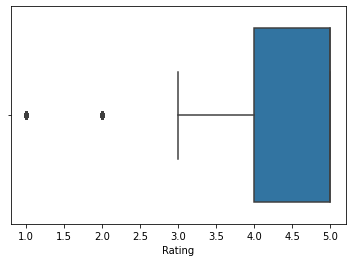

In [ ]:
# Box Plot on Rating
sns.boxplot(merged_beauty_brands['Rating'])

There is existence of outliers in rating column of a merged luxury brands, but we will not drop the outlier because they are rating values.

##  merged all beauty dataset outlier detection

In [ ]:
# Checking for both numeric and categorical variables
numerical = merged_beauty_brands._get_numeric_data().columns
categorical = set(merged_beauty_brands) - set(numerical)
numerical

Index(['verified', 'Rating'], dtype='object')

In [ ]:
merged_beauty_brands['verified'].unique()

array([ True, False])

In [ ]:
type(merged_beauty_brands['verified'].iloc[0])

numpy.bool_

Verified is bool(true/false), and Ratings are numeric.

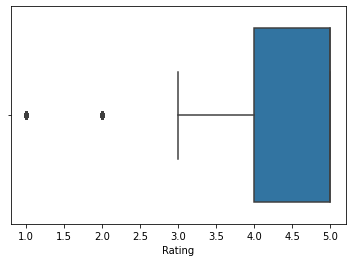

In [ ]:
# Box Plot on rating.
sns.boxplot(merged_luxury_brands['Rating'])

There is existence of outliers in rating column of a merged all beauty dataset, but we will not drop the outlier because they are rating values.

## merged fashion brands dataset outlier detection

In [ ]:
# Checking for both numeric and categorical variables
numerical = merged_fashion_brands._get_numeric_data().columns
categorical = set(merged_fashion_brands) - set(numerical)
numerical

Index(['verified', 'Rating'], dtype='object')

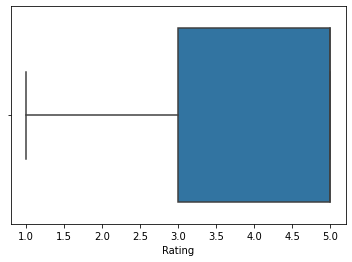

In [ ]:
# Box Plot on rating
sns.boxplot(merged_fashion_brands['Rating'])

There are no outliers in the merged fashion brands.

# Perform Exploratory Data Analysis

## Univariate analysis

In [ ]:
# check for the columns
merged_beauty_brands.columns

Index(['verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName',
       'reviewText', 'Item', 'Rating', 'brand'],
      dtype='object')

Check the columns name of the merged beauty brands.

In [ ]:
# check for the columns
merged_fashion_brands.columns

Index(['verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName',
       'reviewText', 'Item', 'Rating', 'brand'],
      dtype='object')

Check the columns name of the merged fashion brands.

In [ ]:
# check for the columns
merged_luxury_brands.columns

Index(['verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName',
       'reviewText', 'Item', 'Rating', 'brand'],
      dtype='object')

Check the columns name of the merged luxury brands.

In [ ]:
# Checking for summary statistics
merged_fashion_brands.describe()

,Rating
count,916180.000000
mean,3.881602
std,1.414549
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


Merged fashion brands consists of 916180 records , the rating column has the highest value of 5 and the lowest is 1.

Histogram

(array([110380.,      0.,  69291.,      0.,      0., 107119.,      0.,
       161023.,      0., 468367.]), array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]), <a list of 10 Patch objects>) Text(0.5, 1.0, 'Fashion Overall Product Rating') Text(0, 0.5, 'Count') Text(0.5, 0, 'Rating')


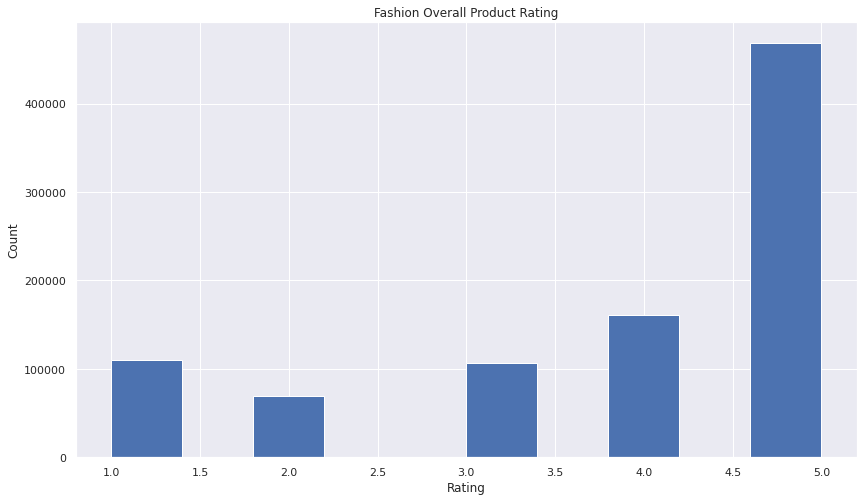

In [ ]:
class univariate:
  hist=plt.hist(merged_fashion_brands['Rating'],10)
  title=plt.title('Fashion Overall Product Rating')
  ylabel=plt.ylabel('Count')
  xlabel=plt.xlabel('Rating')
  def show(self):
    print(self.hist, self.title, self.ylabel, self.xlabel)
X=univariate()
X.show()

In [ ]:
plt.hist(merged_beauty_brands['Rating'],10)
plt.title('Beauty Overall Product Rating')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.show()

NameError: ignored

(array([ 33641.,      0.,  19340.,      0.,      0.,  30040.,      0.,
        59801.,      0., 274375.]), array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]), <a list of 10 Patch objects>) Text(0.5, 1.0, 'Beauty Overall Product Rating') Text(0, 0.5, 'Count') Text(0.5, 0, 'Rating')


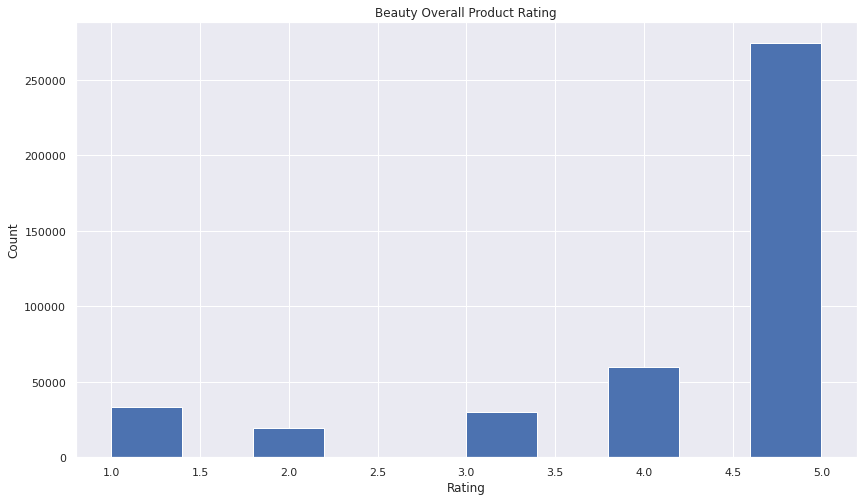

In [ ]:
class univariate:
  hist=plt.hist(merged_beauty_brands['Rating'],10)
  title=plt.title('Beauty Overall Product Rating')
  ylabel=plt.ylabel('Count')
  xlabel=plt.xlabel('Rating')
  def show(self):
    print(self.hist, self.title, self.ylabel, self.xlabel)
X=univariate()
X.show()

(array([ 50.,   0.,  60.,   0.,   0., 129.,   0., 286.,   0., 665.]), array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]), <a list of 10 Patch objects>) Text(0.5, 1.0, 'Luxury Overall Product Rating') Text(0, 0.5, 'Count') Text(0.5, 0, 'Rating')


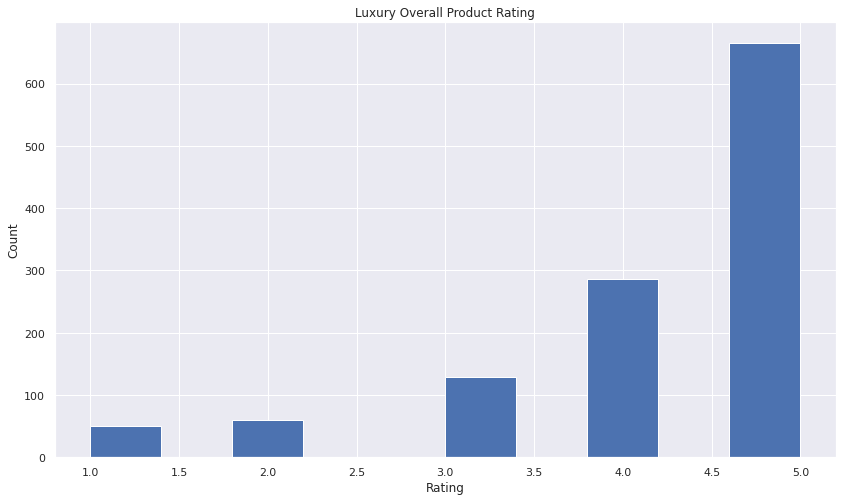

In [ ]:
class univariate:
  hist=plt.hist(merged_luxury_brands['Rating'],10)
  title=plt.title('Luxury Overall Product Rating')
  ylabel=plt.ylabel('Count')
  xlabel=plt.xlabel('Rating')
  def show(self):
    print(self.hist, self.title, self.ylabel, self.xlabel)
X=univariate()
X.show()

5.0 has the highest counts and 2.5 has the lowest count.

Observations

The following observations can be noted from the above visualizations:

 All different categories of product received high ratings of 5.0 stars followed by 4.0 stars to 3.0 stars respectively. This similar trend cut across the 3 categories of fashion, all beauty and luxury beauty where the ratings with the highest frequency was 5.0.
1. For Fashion, the reviews that received 5 stars were 450,000 ratings. The reviews that received 4 stars were 150, 000 ratings and the reviews that received 3 stars were 100, 000 ratings. Very few reviews received 2 and 1 stars.
2. For All Beauty, the reviews that received 5 stars were 250,000 ratings. The reviews that received 4 stars were 50, 000 ratings and the reviews that received 3 stars were 30, 000 ratings.Very few reviews received 2 and 1 stars also.
3. For Luxury Beauty, the reviews that received 5 stars were 650 ratings. The reviews that received 4 stars were 300 ratings and the reviews that received 3 stars were 100 ratings.Very few reviews received 2 and 1 stars.

Conclusion and Recommendations
1. All 3 categories: fashion all beauty and luxury beauty should maintain the quality of services and products because the products reviews mainly received high ratings.


Countplots

In [ ]:
# Define the figure size
sns.set(rc = {'figure.figsize':(14,8)})

# Define the function for plotting the univariate
def countplot(d, col1):
  ans= sns.countplot(data = merged_luxury_brands, x = col1)

AxesSubplot(0.125,0.125;0.775x0.755) Text(0.5, 1.0, 'A Count Plot on Fashion Brands')


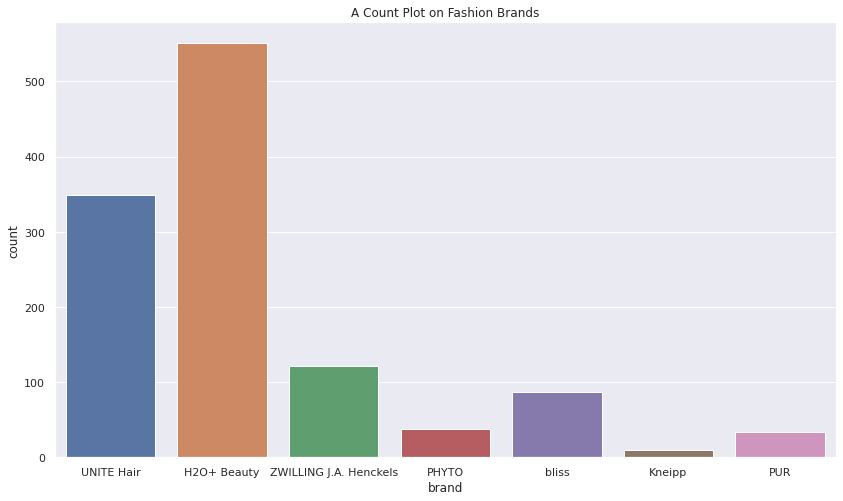

In [ ]:
class univariate:
  plot= sns.countplot(data = merged_luxury_brands, x = 'brand')
  title= plt.title('A Count Plot on Fashion Brands')
  def display(self):
    print(self.plot, self.title) 
S= univariate()
S.display();

Observations

The following observations can be noted from the above visualizations:

1. H20+Beauty and UNITE Hair had the highest number of reviewers.
2. Zwilling J.A. Heckels and bliss followed in the number of reviewers, meaning these brands were moderately popular brands.
3. The brands Kneipp and Purr were the least popular due to the low number of reviews.


Conclusion and Recommendations
1. Kneipp and Purr brands can increase their popularity through brand promotion.

AxesSubplot(0.125,0.125;0.775x0.755) Text(0.5, 1.0, 'A Count Plot on Verified Reviews')


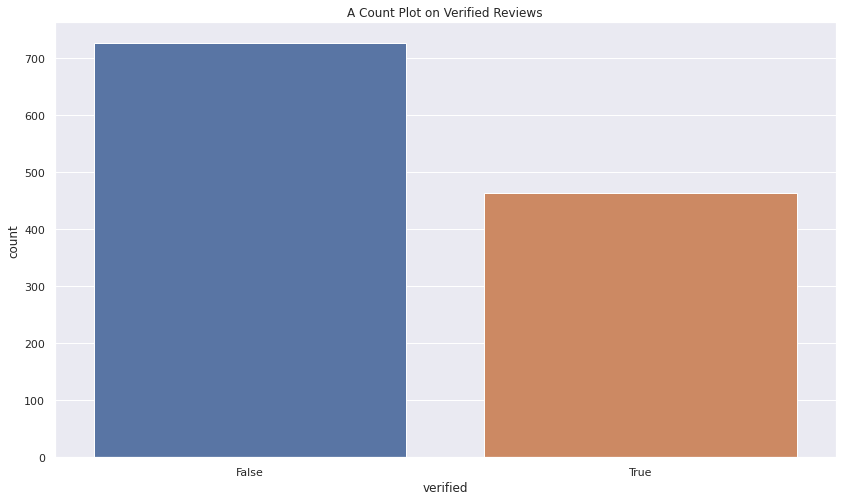

In [ ]:
class univariate:
  plot= sns.countplot(data = merged_luxury_brands, x = 'verified')
  title= plt.title('A Count Plot on Verified Reviews')
  def display(self):
    print(self.plot, self.title) 
S= univariate()
S.display();

Observations

1. A higher number of verified reviews were false rather than true meaning most customers were not verified reviewers. Customers purchased the product with deep discount or any other form of coercion.

Conclusion and Recommendations
1. Quality of products should be improved in order for customers to give a higher number of verified reviews.

AxesSubplot(0.125,0.125;0.775x0.755) Text(0.5, 1.0, 'A Count Plot on Review Product ID')


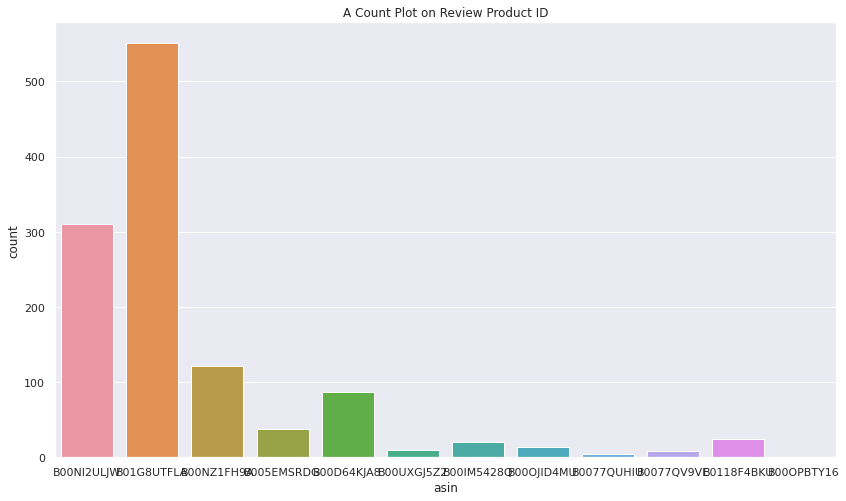

In [ ]:
class univariate:
  plot= sns.countplot(data = merged_luxury_brands, x = 'asin')
  title= plt.title('A Count Plot on Review Product ID')
  def display(self):
    print(self.plot, self.title) 
S= univariate()
S.display();

 Observations

The following observations can be noted from the above visualizations:

1. The product ID with the highest number of reviews was B01G8UTFL at a count of 550 followed by B00N12ULJ at 310 then B00NZ1FH9 at 120. 
2. The product ID with the least number of reviews was B00PTY16.


Conclusion and Recommendations
1. A pattern is noticed in the reviews that a large majority of the customers are satisfied with the fashion, all beauty and luxury beauty products. Further analysis will be carried out in the bivariate section.

# Bivariate Analysis

## Categorical vs Categorical

#### Clustered bars.

In [ ]:
# Define the figure size
sns.set(rc = {'figure.figsize':(14,8)})

# Define the function for plotting the bivariate
def countplot(d, col1, col2):
  ans= sns.countplot(data = merged_luxury_brands, x = col1, hue = col2)
  

None


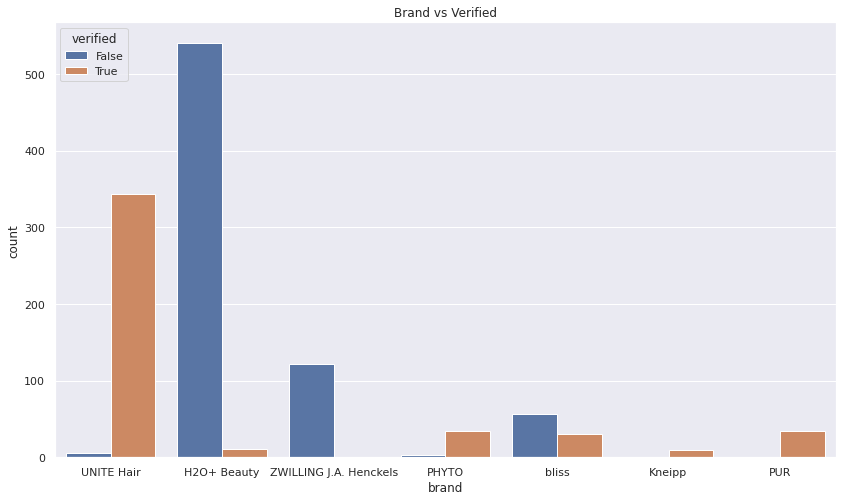

In [ ]:
# brand vs verified
# Calling the function
print(countplot(merged_luxury_brands, 'brand', 'verified'));
# Title
plt.title('Brand vs Verified');

Verified variable means amazon have verified the that the reviewer has purchased the product without deep discount or any other form of coersion.

From the above visualization we note the following observations;

1. Unite Hair had the most verified reviewers.

2. All the reviewers of Kneipp and PUR brands were verified.

3. H2O + Beauty had the most unverified reviewers followed by ZWILLING J.A
  Henckles

### Conclusions.

1. The reviewers of Unite hair are genuine and most likely return customers.

2. Based on the reviews , the popularity of Kneipp and PUR brands is quite low.


### Recommendation.

1. The unite hair brand could widen their product range, introduce promotions 
   such as discounts or giveaways to increase the sales volume in already 
   existing customer base.
2. Kneip and PUR should engage in an extensive product promotion and brand awareness inorder to widen their market scope for their products

None


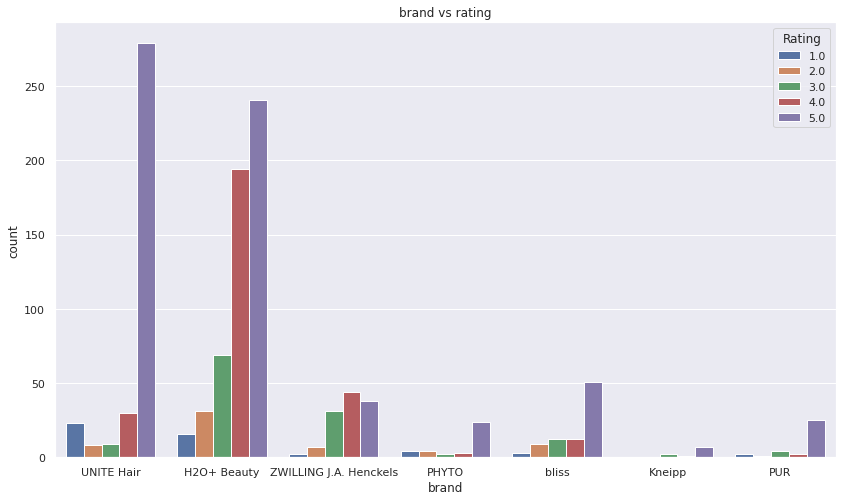

In [ ]:
# Brand vs Rating
# Calling the function
print(countplot(merged_luxury_brands, 'brand', 'Rating'))
# Title
plt.title('brand vs rating');

From the visualization above we note the following:

1. Unite hair, H2O+Beauty, PHYTO, bliss, kneipp and Pur have the highest ratings as 5.0 among the reviews.

2. ZWILLING J.A Henckels's  highest ratings is 4.0 followed by 5.0 and 3.0 respectively.

### Conclusion

1. Most of the customers of Unite hair, H2O+Beauty, PHYTO, bliss, kneipp and 
   Pur are fully satisfied with brand products.
2. Customers of ZWILLING J.A Henckels are satisfied with the brand products
   but they are not fully satisfied.

## Recommendation

1. Unite hair, H2O+Beauty, PHYTO, bliss, kneipp and Pur  should maintain the same quality of services, product standards and userbility to retain the customers loyalty to their brands.

2. ZWILLING J.A Henckels should improve on the quality and services of their products, inorder to meet the needs of their customers and for their products to receive better ratings.

# Sentiment Analysis

In [ ]:
# Imports
import nltk
import spacy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
%matplotlib inline

In [ ]:
# NLTK downloads
nltk.download([
               'stopwords',
               'punkt',
               'names',
               'vader_lexicon',
               'wordnet',
               'averaged_perceptron_tagger',
               'omw-1.4',
               'sentiwordnet'
               
               
])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already u

True

In [ ]:
!pip install vaderSentiment

In [ ]:
# nltk imports
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import sentiwordnet as swn

## Data Preparation

In [ ]:
# Copy of the original dataset
review = merged_fashion_brands.copy()


### Cleaning

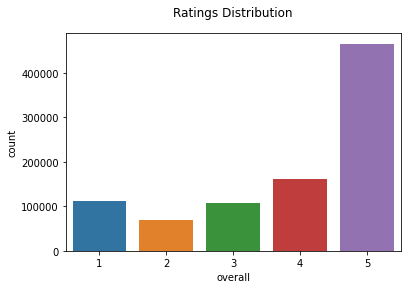

In [ ]:
# Preview of ratings distribution
sns.countplot(data = review, x = 'overall')
plt.title('Ratings Distribution', y = 1.05)
plt.show()

Most ratings were great.

In [ ]:
# Removing special and numbers characters
def RemoveSpecial(text):
  # Removing special characters
  text = re.sub('[^a-zA-Z]+', ' ', text)
  return text



In [ ]:
# Creating a cleaned review column
review['cleanedReview'] = review['reviewText'].apply(RemoveSpecial) 
# Previewing changes
review['cleanedReview'].head()

In [ ]:
# Tokenizing and POS tagging for lemmatization
def POSTag(text):
  tagged = pos_tag(word_tokenize(text))
  # List that will contain final results
  tagged_new = []
  # Dictionary to covert POS tags to WordNet tags for lemmatization
  pos_dict =  {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
  # Removing stop words
  for word, tag in tagged:
    if word.lower() not in set(stopwords.words('english')):
      tagged_new.append(tuple([word, pos_dict.get(tag[0])]))
  return tagged_new

In [ ]:
# Creating a cleaned review column
review['cleanedReviewTagged'] = review['cleanedReview'].apply(POSTag) 
# Previewing changes
review['cleanedReviewTagged'].head()

In [ ]:
# Previewing changes
review[['reviewText', 'cleanedReview', 'cleanedReviewTagged']].head()

In [ ]:
# Saving changes for faster processing
pos_tagging = review.to_csv('pos_tagged_reviews.csv')

In [ ]:
# Lemmatization function
def lemmatize(tagged_data):
  lemmatizer = WordNetLemmatizer()
  lemmatized = ' '
  for word, pos in tagged_data:
    if not pos:
      lemma = word
      lemmatized = lemmatized + ' ' + lemma
    else:
      lemma = lemmatizer.lemmatize(word, pos=pos)
      lemmatized = lemmatized + ' ' + lemma
  return lemmatized




In [ ]:
# Lemmatization
review['cleanedReviewLemmatized'] = review['cleanedReviewTagged'].apply(lemmatize)
review['cleanedReviewLemmatized'].head()

In [ ]:
# Saving changes for faster processing
lemmatized_reviews = review.to_csv('lemmatized_reviews.csv')

Extracting Sentiments

In [ ]:
TextBlob(review['cleanedReviewLemmatized'].iloc[0]).sentiment

In [ ]:
# Dataset loading
reviews_cleaned = pd.read_csv('lemmatized_reviews.csv')

**TextBlob**

## ABSA

In [ ]:
# Importing spacy
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
reviews_cleaned.columns

Index(['Unnamed: 0', 'overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'Item',
       'Rating', 'Timestamp', 'brand', 'cleanedReview', 'cleanedReviewTagged',
       'cleanedReviewLemmatized'],
      dtype='object')

In [ ]:
# ABSA function
def ABSA(text):
  aspects = []
  i = 0
  for i, sentence in enumerate(text):
    doc = nlp(sentence)
    descriptive_term = ''
    target = ''
    for token in doc:
      if (token.pos_ == 'NOUN'):
        target = token.text
      if token.pos_ == 'ADJ':
        prepend = ''
        for child in token.children:
          if child.pos_ != 'ADV':
            continue
          prepend += child.text + ' '
        descriptive_term = prepend + token.text
    aspects.append({'aspect': target,
      'description': descriptive_term})
  return aspects


In [ ]:
ABSA(reviews_cleaned['cleanedReviewLemmatized'].iloc[0:5])

[{'aspect': 'Love', 'description': 'Simply elegant'},
 {'aspect': 'Love', 'description': 'Simply elegant'},
 {'aspect': '', 'description': ''},
 {'aspect': '', 'description': ''},
 {'aspect': 'shipping', 'description': 'fast'}]

In [ ]:
reviews_cleaned['ABSA'] = ABSA(reviews_cleaned['cleanedReviewLemmatized'])

In [ ]:
absa = reviews_cleaned.to_csv('absa.csv')

In [ ]:
reviews_cleaned.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,Item,Rating,Timestamp,brand,cleanedReview,cleanedReviewTagged,cleanedReviewLemmatized,ABSA
0,0,5,True,"09 25, 2015",A3DDWDH9PX2YX2,B00J8WZBEG,Sonja Lau,Simply and elegant! Love it!,charming!,1443139200,7106116521,2.0,1411862400,Unknown,Simply and elegant Love it,"[('Simply', 'n'), ('elegant', 'a'), ('Love', '...",Simply elegant Love,"{'aspect': 'Love', 'description': 'Simply eleg..."
1,1,5,True,"09 25, 2015",A3DDWDH9PX2YX2,B00J8WZBEG,Sonja Lau,Simply and elegant! Love it!,charming!,1443139200,B00J8WZBEG,5.0,1443139200,Unknown,Simply and elegant Love it,"[('Simply', 'n'), ('elegant', 'a'), ('Love', '...",Simply elegant Love,"{'aspect': 'Love', 'description': 'Simply eleg..."
2,2,5,True,"02 15, 2017",A29HLOUW0NS0EH,B01AQW1XI4,Patricia R. Erwin,Just what I wanted.,Five Stars,1487116800,7106116521,5.0,1405728000,TOFL,Just what I wanted,"[('wanted', 'v')]",want,"{'aspect': '', 'description': ''}"
3,3,5,True,"02 15, 2017",A29HLOUW0NS0EH,B01AQW1XI4,Patricia R. Erwin,Just what I wanted.,Five Stars,1487116800,B01AQW1XI4,5.0,1487116800,TOFL,Just what I wanted,"[('wanted', 'v')]",want,"{'aspect': '', 'description': ''}"
4,4,5,True,"07 26, 2016",A2JQ5SR88NQX8P,B01AQW1XI4,N. Rosario,"These shoelaces look very nice, they're at a g...",Five Stars,1469491200,B00062NHH0,5.0,1426032000,TOFL,These shoelaces look very nice they re at a go...,"[('shoelaces', 'n'), ('look', 'v'), ('nice', '...",shoelace look nice good price fast shipping,"{'aspect': 'shipping', 'description': 'fast'}"


In [ ]:
# Re-loading data
absa = pd.read_csv('absa.csv')

In [ ]:
# Positive aspects
positive = absa[absa['overall'] >=4]
neutral = absa[absa['overall'] == 3]
negative = absa[absa['overall'] < 3]

In [ ]:
# ABSA column results
results_positive = positive['ABSA']
results_neutral = neutral['ABSA']
results_negative = negative['ABSA']
results_positive.head()

0    {'aspect': 'Love', 'description': 'Simply eleg...
1    {'aspect': 'Love', 'description': 'Simply eleg...
2                    {'aspect': '', 'description': ''}
3                    {'aspect': '', 'description': ''}
4        {'aspect': 'shipping', 'description': 'fast'}
Name: ABSA, dtype: object

In [ ]:
import ast

In [ ]:
# Retriving dictionary
positive_dicts = []
neutral_dicts = []
negative_dicts = []
# Coverting strings to dictionary
for value in results_positive:
  positive_dicts.append(ast.literal_eval(value))
for value in results_neutral:
  neutral_dicts.append(ast.literal_eval(value))
for value in results_negative:
  negative_dicts.append(ast.literal_eval(value))

In [ ]:
# Apsects and descriptions
positive_aspects = []
neutral_aspects = []
negative_aspects = []
positive_descriptions = []
neutral_descriptions = []
negative_descriptions = []
for value in positive_dicts:
  positive_aspects.append(value['aspect'])
  positive_descriptions.append(value['description'])
for value in neutral_dicts:
  neutral_aspects.append(value['aspect'])
  neutral_descriptions.append(value['description'])
for value in negative_dicts:
  negative_aspects.append(value['aspect'])
  negative_descriptions.append(value['description'])
# Preview
positive_aspects[:5]

['Love', 'Love', '', '', 'shipping']

In [ ]:
# Removing empty aspects
positive_aspects = [value for value in positive_aspects if value != '']
positve_descriptions = [value for value in positive_descriptions if value != '']
neutral_aspects = [value for value in neutral_aspects if value != '']
neutral_descriptions = [value for value in neutral_descriptions if value != '']
negative_aspects = [value for value in negative_aspects if value != '']
negative_descriptions = [value for value in negative_descriptions if value != '']
positive_aspects[:5]

['Love', 'Love', 'shipping', 'shipping', 'lace']

In [ ]:
from wordcloud import WordCloud,  ImageColorGenerator
from PIL import Image

In [ ]:
# Word cloud function
def Cloud(data):
  unique_string = ' '.join(data)
  fig, ax = plt.subplots(figsize = (15, 8))
  word_cloud = WordCloud(width =5000, height = 3000,
                         background_color='white',
                         colormap = 'hot').generate(unique_string)
  plt.imshow(word_cloud)
  plt.axis("off")
  plt.title('Aspect Word Cloud', y = 1.05)
  plt.show()



In [ ]:
def CustomCloud(data, path):
  unique_string = ' '.join(data)
  mask = np.array(Image.open(path))
  wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,
                        background_color='white', colormap='hot',
                        collocations=False,
                        max_font_size=70,
                        mask=mask).generate(unique_string)
  # create coloring from image
  image_colors = ImageColorGenerator(mask)
  plt.figure(figsize=(20,20))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  # store to file
  plt.savefig("amazon.png", format="png") 
  plt.show()


In [ ]:
# Amazon logo word cloud mask
mask = np.array(Image.open("amazon_logo_2.png"))

**Positive**

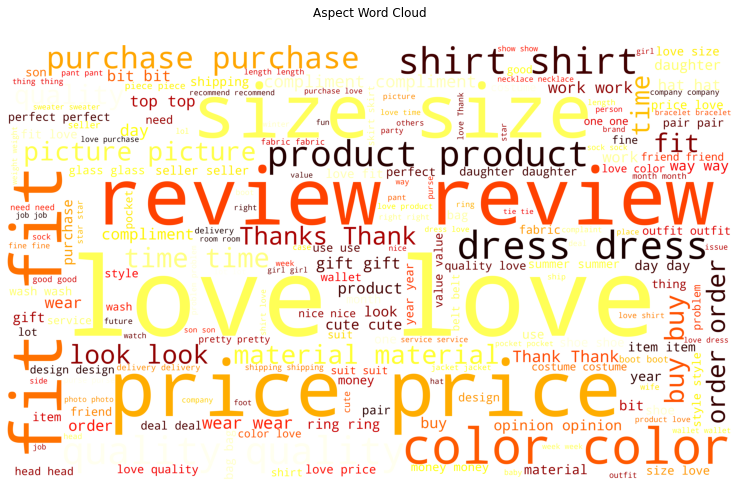

In [ ]:
# Positive apsects word clouds
Cloud(positive_aspects)

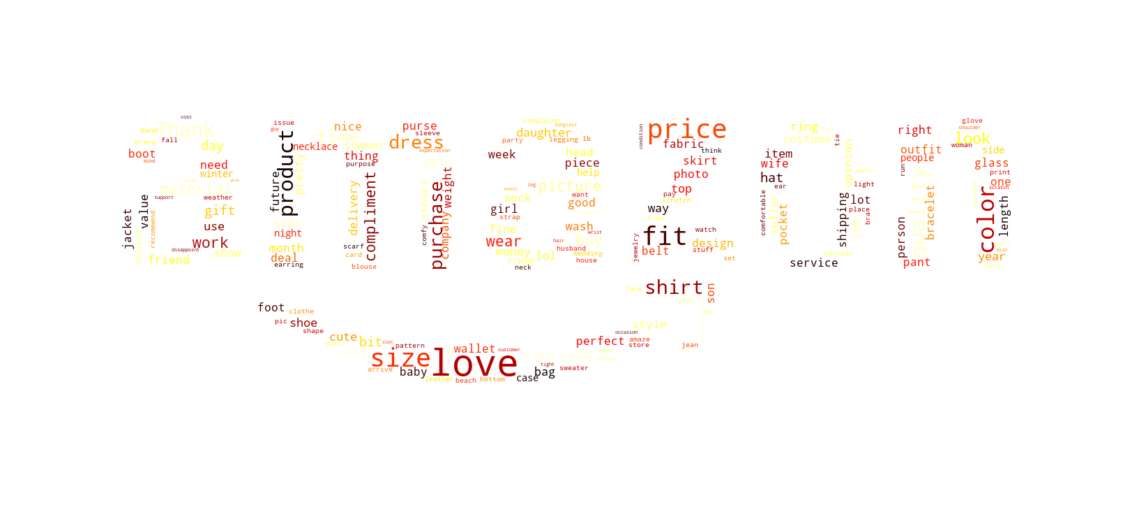

In [ ]:
# Positive apsects word cloud
CustomCloud(positive_aspects, "amazon_logo_2.png")

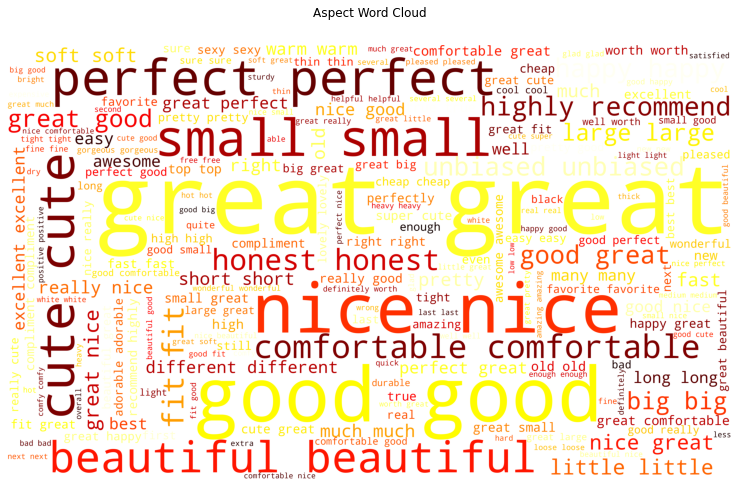

In [ ]:
# Positive descriptions word cloud
Cloud(positive_descriptions)

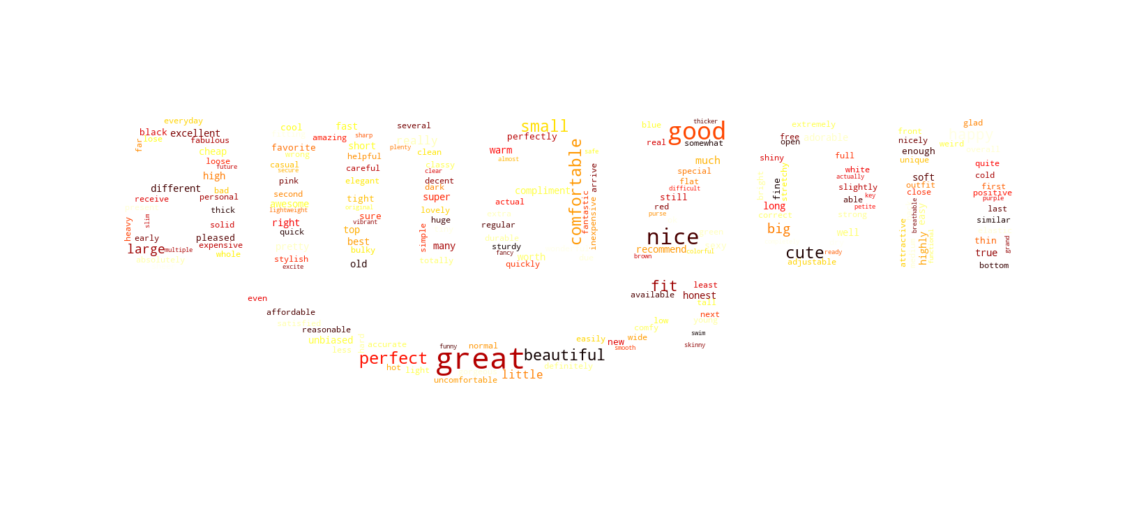

In [ ]:
# Amazon logo
CustomCloud(positive_descriptions, "amazon_logo_2.png")

**Neutral**

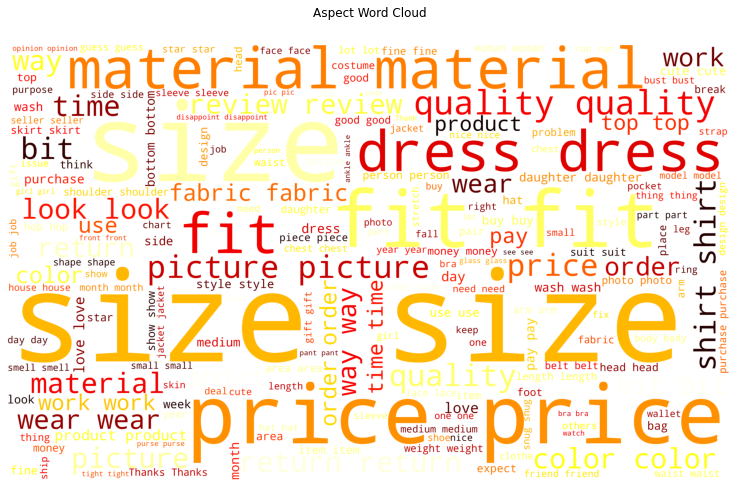

In [ ]:
# Neutral descriptions word cloud
Cloud(neutral_aspects)

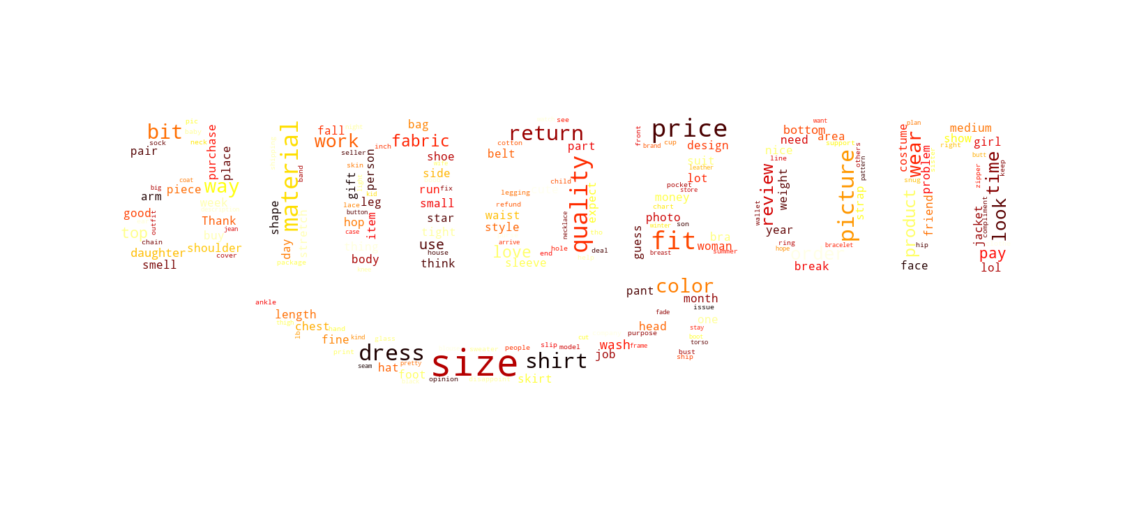

In [ ]:
# Amazon logo
CustomCloud(neutral_aspects, "amazon_logo_2.png")

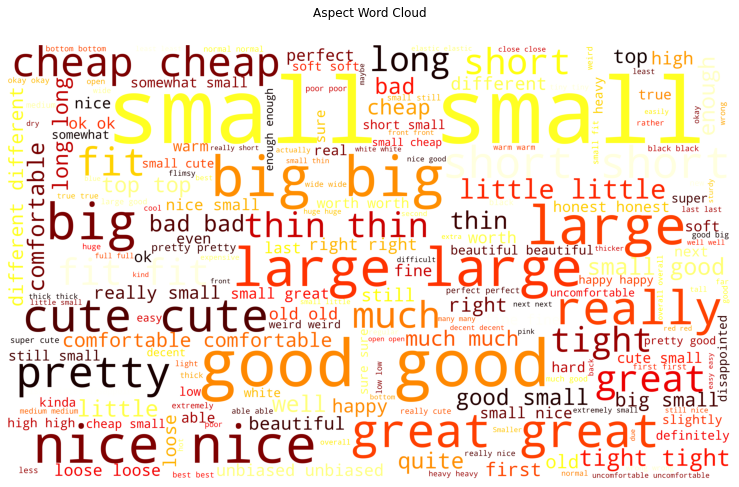

In [ ]:
# Neutral apsects word cloud
Cloud(neutral_descriptions)

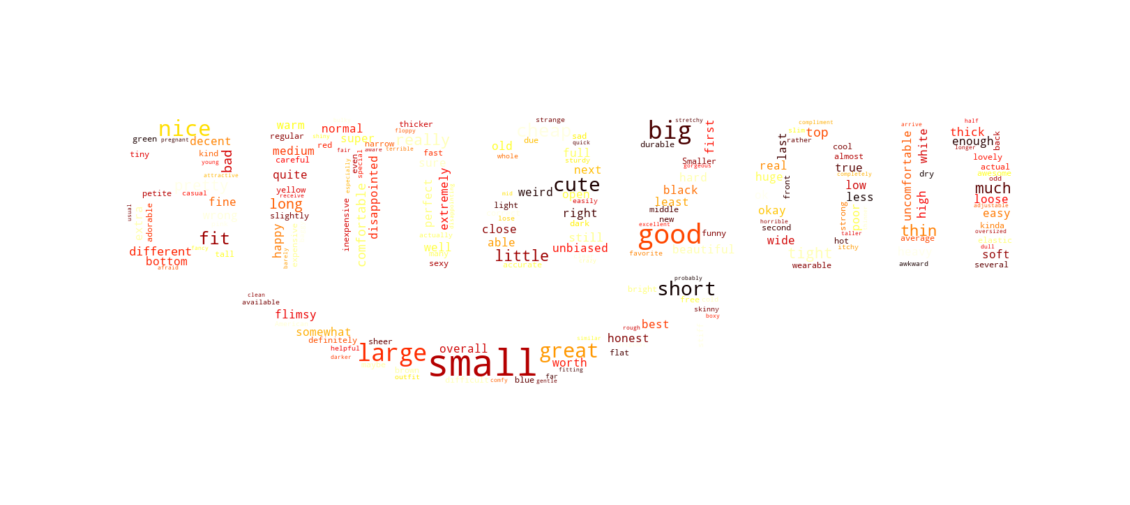

In [ ]:
# Amazon logo
CustomCloud(neutral_descriptions, "amazon_logo_2.png")

**Negative**

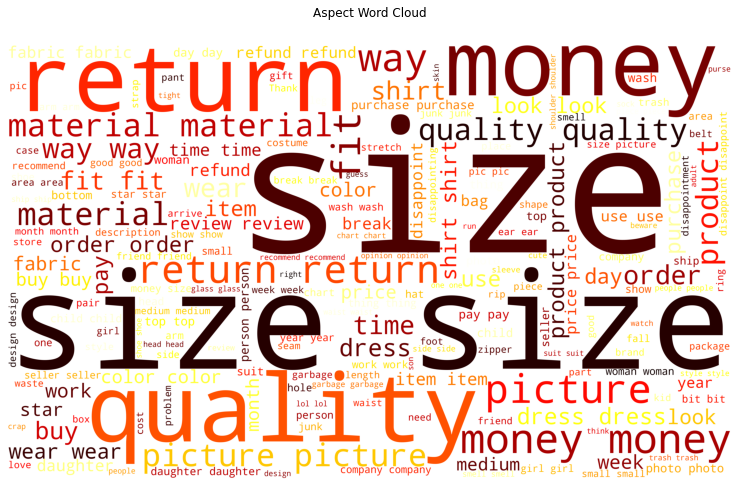

In [ ]:
# Negative apsects word cloud
Cloud(negative_aspects)

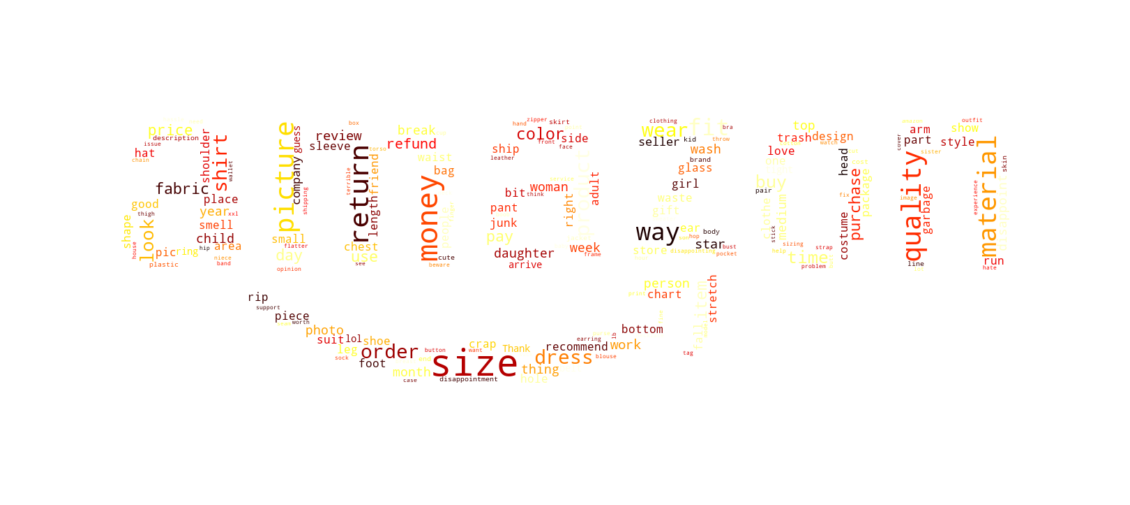

In [ ]:
# Amazon logo
CustomCloud(negative_aspects, "amazon_logo_2.png")

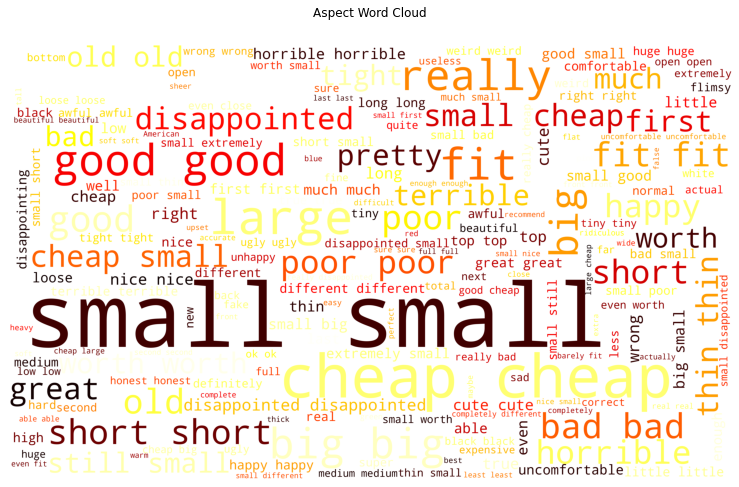

In [ ]:
# negative apsects word cloud
Cloud(negative_descriptions)

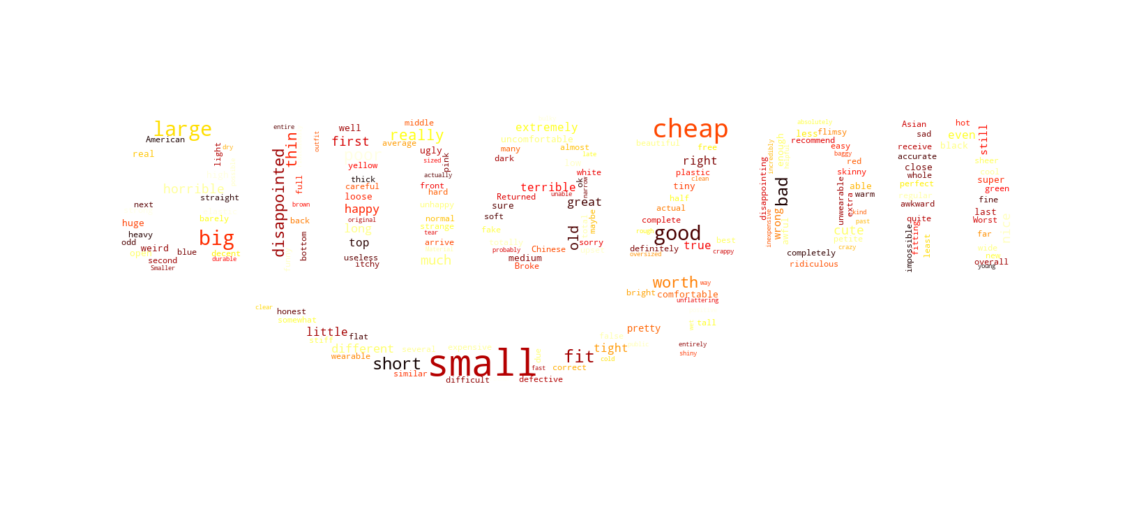

In [ ]:
# Amazon logo
CustomCloud(negative_descriptions, "amazon_logo_2.png")

In [ ]:
# Aspects
positive_aspects = pd.Series(positive_aspects)
neutral_aspects = pd.Series(neutral_aspects)
negative_aspects = pd.Series(negative_aspects)
# Descriptions
positive_descriptions = pd.Series(positive_descriptions)
neutral_descriptions = pd.Series(neutral_descriptions)
negative_descriptions = pd.Series(negative_descriptions)
# Unique aspects
unique_pa = pd.Series(np.unique(positive_aspects))
unique_nua = pd.Series(np.unique(neutral_aspects))
unique_na = pd.Series(np.unique(negative_aspects))
# Unique descriptions
unique_pdesc = pd.Series(np.unique(positive_descriptions))
unique_nudesc = pd.Series(np.unique(neutral_descriptions))
unique_ndesc = pd.Series(np.unique(negative_descriptions))

**Positive Aspects**

In [ ]:
# Aspects value counts
positive_aspects.value_counts()[:10]

love       23325
price      15934
size       15071
fit        14073
color      12010
Love       11927
quality    11420
product     9623
review      8926
shirt       8421
dtype: int64

**Positive Descriptions**

In [ ]:
# Descriptions value counts
positive_descriptions.value_counts()[:10]

               109188
great           37560
good            24824
nice            18018
Great           18002
perfect         14325
small           13399
comfortable     11342
fit              9848
cute             9676
dtype: int64

**Neutral Aspects**

In [ ]:
# Aspects value counts
neutral_aspects.value_counts()[:10]

size        5633
price       2041
fit         1985
material    1814
quality     1795
picture     1550
dress       1527
shirt       1366
return      1335
bit         1254
dtype: int64

**Neutral Descriptions**

In [ ]:
# Descriptions value counts
neutral_descriptions.value_counts()[:10]

small    9591
good     3773
big      3530
large    3137
nice     2080
short    2039
great    2007
cute     1664
fit      1649
cheap    1634
dtype: int64

**Negative Aspects**

In [ ]:
# Aspects value counts
negative_aspects.value_counts()[:10]

size        8436
money       4872
return      4506
quality     4095
picture     4027
material    3753
way         3185
fit         2927
product     2320
order       2030
dtype: int64

**Negative Descriptions**

In [ ]:
# Descriptions value counts
negative_descriptions.value_counts()[:10]

small    19194
cheap     6431
big       4291
good      4258
large     4012
fit       2862
short     2659
bad       2288
worth     2074
old       1954
dtype: int64

## Modelling

### TextBlob and VADER

In [ ]:
# Loading data
absa = pd.read_csv('absa.csv')

In [ ]:
# Sampling
stratified = absa.groupby('overall', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
stratified.shape

(91618, 19)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Classification report funtion
def Report(y_test, y_pred, data):
  print('\nClassification Report\n')
  report = classification_report(data[y_test], data[y_pred])
  print(report)
  print()
  print()
  # Heatmap
  fig, ax = plt.subplots(figsize = (10, 8))
  sns.heatmap(confusion_matrix(data[y_test], data[y_pred]),
              xticklabels=data[y_test].unique(),
              yticklabels=data[y_test].unique(),annot=True,
            cmap='viridis', fmt = 'g')
  plt.title('Heatmap', y = 1.05);

In [ ]:
# Grouping sentiments
stratified['Grouped_Sentiments'] = ''
# Positive sentiments
stratified.loc[stratified['overall'] > 3,
               'Grouped_Sentiments'] = 'Positive'
# Neutral sentiments
stratified.loc[stratified['overall'] == 3,
               'Grouped_Sentiments'] = 'Neutral'
# Negative sentiments
stratified.loc[stratified['overall'] < 3,
               'Grouped_Sentiments'] = 'Negative'               

In [ ]:
# New columns
stratified['TextBlob_Sentiments'] = ''
stratified['VADER_Sentiments'] = ''

In [ ]:
stratified.drop('TextBlobSentiments', axis = 1, inplace = True)

In [ ]:
# Reset index
stratified.reset_index(drop = True, inplace = True)
stratified.head()

,Unnamed: 0,Unnamed: 0.1,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,...,Rating,Timestamp,brand,cleanedReview,cleanedReviewTagged,cleanedReviewLemmatized,ABSA,Grouped_Sentiments,TextBlob_Sentiments,VADER_Sentiments
0,743432,743432,1,True,"07 25, 2014",AKSMCU94DV09S,B00KQCOCCY,Nanyelin,Way too large. Doesn't fit.,Does not fit,...,1.0,1406246400,WOW CLOTHES,Way too large Doesn t fit,"[('Way', 'n'), ('large', 'a'), ('fit', 'n')]",Way large fit,"{'aspect': 'fit', 'description': 'large'}",Negative,Positive,Neutral
1,403366,403366,1,True,"09 25, 2015",A21G9YN0O9NF54,B00JUJIOG4,Rande Capps,Can not wash this stiff and hard,Can not wash this stiff and hard,...,1.0,1443139200,TRURENDI,Can not wash this stiff and hard,"[('wash', 'v'), ('stiff', 'n'), ('hard', 'a')]",wash stiff hard,"{'aspect': '', 'description': 'stiff'}",Negative,Negative,Neutral
2,871823,871823,1,True,"06 14, 2016",A2HQJEH6DR2JJ1,B019WAJGY4,Law Dog,This watch was complete junk! It quit working...,Complete Junk!,...,1.0,1465862400,ShuHang,This watch was complete junk It quit working w...,"[('watch', 'n'), ('complete', 'a'), ('junk', '...",watch complete junk quit work within matter ...,"{'aspect': 'crap', 'description': 'complete'}",Negative,Negative,Neutral
3,732535,732535,1,True,"01 22, 2014",A7YIDFP5EN3YB,B00FY5J4FI,G. Dearsman,There is a sticker underneath the loom sticker...,False Advertising,...,1.0,1390348800,Funky Loomz TM,There is a sticker underneath the loom sticker...,"[('sticker', 'n'), ('underneath', None), ('loo...",sticker underneath loom sticker find make so...,"{'aspect': 'item', 'description': 'complete'}",Negative,Positive,Neutral
4,660142,660142,1,True,"05 5, 2016",A3DSYPCLP0021U,B017LTOL84,Sondra bell,"it was too small, I couldn't get it over my he...",One Star,...,5.0,1462406400,Froomer,it was too small I couldn t get it over my hea...,"[('small', 'a'), ('get', 'v'), ('head', 'n'), ...",small get head shirt small person,"{'aspect': 'person', 'description': 'small'}",Negative,Negative,Neutral


**TextBlob**

In [ ]:
# TextBlob sentiments
row = 0
for text in stratified['cleanedReviewLemmatized']:
  stratified.loc[row, 'TextBlob_Sentiments'] = TextBlobSentiments(text)
  row += 1

**VADER**

In [ ]:
# VADER sentiments
row = 0
for text in stratified['cleanedReviewLemmatized']:
  stratified.loc[row, 'VADER_Sentiments'] = VADERSentiments(text)
  row += 1

In [ ]:
# Function used to encode results
def Encode(column, data):
  data.loc[data[column] == 'Negative', column] = 0
  data.loc[data[column] == 'Neutral', column] = 1
  data.loc[data[column] == 'Positive', column] = 2


In [ ]:
# Dataset copy
stratified_encoded = stratified.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Previweing changes
stratified_encoded.head()

,Unnamed: 0,Unnamed: 0.1,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,...,Rating,Timestamp,brand,cleanedReview,cleanedReviewTagged,cleanedReviewLemmatized,ABSA,Grouped_Sentiments,TextBlob_Sentiments,VADER_Sentiments
0,743432,743432,1,True,"07 25, 2014",AKSMCU94DV09S,B00KQCOCCY,Nanyelin,Way too large. Doesn't fit.,Does not fit,...,1.0,1406246400,WOW CLOTHES,Way too large Doesn t fit,"[('Way', 'n'), ('large', 'a'), ('fit', 'n')]",Way large fit,"{'aspect': 'fit', 'description': 'large'}",Negative,Positive,Neutral
1,403366,403366,1,True,"09 25, 2015",A21G9YN0O9NF54,B00JUJIOG4,Rande Capps,Can not wash this stiff and hard,Can not wash this stiff and hard,...,1.0,1443139200,TRURENDI,Can not wash this stiff and hard,"[('wash', 'v'), ('stiff', 'n'), ('hard', 'a')]",wash stiff hard,"{'aspect': '', 'description': 'stiff'}",Negative,Negative,Neutral
2,871823,871823,1,True,"06 14, 2016",A2HQJEH6DR2JJ1,B019WAJGY4,Law Dog,This watch was complete junk! It quit working...,Complete Junk!,...,1.0,1465862400,ShuHang,This watch was complete junk It quit working w...,"[('watch', 'n'), ('complete', 'a'), ('junk', '...",watch complete junk quit work within matter ...,"{'aspect': 'crap', 'description': 'complete'}",Negative,Negative,Neutral
3,732535,732535,1,True,"01 22, 2014",A7YIDFP5EN3YB,B00FY5J4FI,G. Dearsman,There is a sticker underneath the loom sticker...,False Advertising,...,1.0,1390348800,Funky Loomz TM,There is a sticker underneath the loom sticker...,"[('sticker', 'n'), ('underneath', None), ('loo...",sticker underneath loom sticker find make so...,"{'aspect': 'item', 'description': 'complete'}",Negative,Positive,Neutral
4,660142,660142,1,True,"05 5, 2016",A3DSYPCLP0021U,B017LTOL84,Sondra bell,"it was too small, I couldn't get it over my he...",One Star,...,5.0,1462406400,Froomer,it was too small I couldn t get it over my hea...,"[('small', 'a'), ('get', 'v'), ('head', 'n'), ...",small get head shirt small person,"{'aspect': 'person', 'description': 'small'}",Negative,Negative,Neutral


In [ ]:
# Label encoding
lable_encoder = LabelEncoder()
stratified_encoded[['Grouped_Sentiments',	'TextBlob_Sentiments',	'VADER_Sentiments']] = stratified[['Grouped_Sentiments',	'TextBlob_Sentiments',	'VADER_Sentiments']].apply(lable_encoder.fit_transform)

In [ ]:
# Previewing changes
stratified_encoded.head()

,Unnamed: 0,Unnamed: 0.1,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,...,Rating,Timestamp,brand,cleanedReview,cleanedReviewTagged,cleanedReviewLemmatized,ABSA,Grouped_Sentiments,TextBlob_Sentiments,VADER_Sentiments
0,743432,743432,1,True,"07 25, 2014",AKSMCU94DV09S,B00KQCOCCY,Nanyelin,Way too large. Doesn't fit.,Does not fit,...,1.0,1406246400,WOW CLOTHES,Way too large Doesn t fit,"[('Way', 'n'), ('large', 'a'), ('fit', 'n')]",Way large fit,"{'aspect': 'fit', 'description': 'large'}",0,2,1
1,403366,403366,1,True,"09 25, 2015",A21G9YN0O9NF54,B00JUJIOG4,Rande Capps,Can not wash this stiff and hard,Can not wash this stiff and hard,...,1.0,1443139200,TRURENDI,Can not wash this stiff and hard,"[('wash', 'v'), ('stiff', 'n'), ('hard', 'a')]",wash stiff hard,"{'aspect': '', 'description': 'stiff'}",0,0,1
2,871823,871823,1,True,"06 14, 2016",A2HQJEH6DR2JJ1,B019WAJGY4,Law Dog,This watch was complete junk! It quit working...,Complete Junk!,...,1.0,1465862400,ShuHang,This watch was complete junk It quit working w...,"[('watch', 'n'), ('complete', 'a'), ('junk', '...",watch complete junk quit work within matter ...,"{'aspect': 'crap', 'description': 'complete'}",0,0,1
3,732535,732535,1,True,"01 22, 2014",A7YIDFP5EN3YB,B00FY5J4FI,G. Dearsman,There is a sticker underneath the loom sticker...,False Advertising,...,1.0,1390348800,Funky Loomz TM,There is a sticker underneath the loom sticker...,"[('sticker', 'n'), ('underneath', None), ('loo...",sticker underneath loom sticker find make so...,"{'aspect': 'item', 'description': 'complete'}",0,2,1
4,660142,660142,1,True,"05 5, 2016",A3DSYPCLP0021U,B017LTOL84,Sondra bell,"it was too small, I couldn't get it over my he...",One Star,...,5.0,1462406400,Froomer,it was too small I couldn t get it over my hea...,"[('small', 'a'), ('get', 'v'), ('head', 'n'), ...",small get head shirt small person,"{'aspect': 'person', 'description': 'small'}",0,0,1


**Results**

*TextBlob*


Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.24      0.14      0.18     11167
           2       0.06      0.59      0.10      6996
           3       0.00      0.00      0.00     10781
           4       0.00      0.00      0.00     16135
           5       0.00      0.00      0.00     46539

    accuracy                           0.06     91618
   macro avg       0.05      0.12      0.05     91618
weighted avg       0.03      0.06      0.03     91618





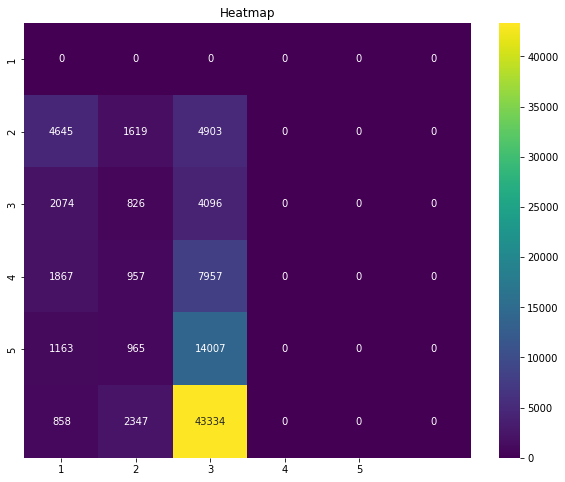

In [ ]:
# TextBlob Classification Report
Report('overall', 'TextBlob_Sentiments', stratified_encoded)

The precision scores and accuracy scores are very low.

*VADER*


Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.25      0.66      0.36     11167
           2       0.04      0.36      0.08      6996
           3       0.00      0.00      0.00     10781
           4       0.00      0.00      0.00     16135
           5       0.00      0.00      0.00     46539

    accuracy                           0.11     91618
   macro avg       0.05      0.17      0.07     91618
weighted avg       0.03      0.11      0.05     91618





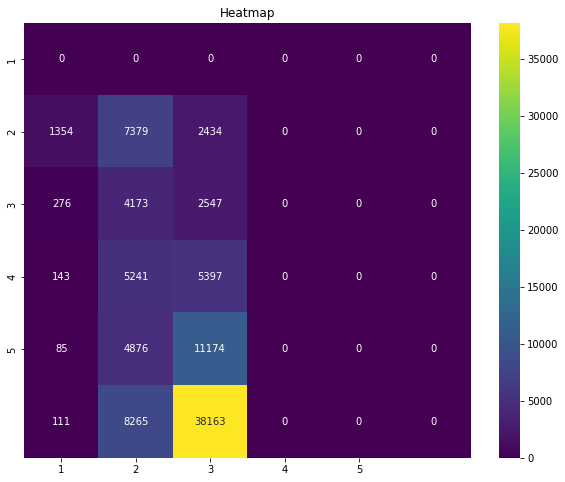

In [ ]:
# VADER Classification Report
Report('overall', 'VADER_Sentiments', stratified_encoded)

Though the perfromance improves slightly, the precision scores and accuracy scores are still very low.

*Saving Results*

In [ ]:
# Saving results
stratified.to_csv('blobVaderXg.csv')

### XGBOOST

**Train-test-splt**

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from imblearn.over_sampling import SMOTE

In [ ]:
# Loading data
absa = pd.read_csv('absa.csv')

In [ ]:
# Sampling
stratified = absa.groupby('overall', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
stratified.shape

(91618, 19)

In [ ]:
# Features and label
X = stratified['cleanedReviewLemmatized'].values
y = stratified['overall'].values
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
                                                    random_state = 0)

In [ ]:
# Count Vectorizer
tfid_vectorizer = TfidfVectorizer()
X_train_tfid = tfid_vectorizer.fit_transform(X_train)
X_test_tfid = tfid_vectorizer.transform(X_test)

In [ ]:
# XGBoostClassifier
classifier = xgb.XGBClassifier()
classifier.fit(X_train_tfid, y_train)
predictions = classifier.predict(X_test_tfid)

In [ ]:
# Classifcation function
def XGBoostClass(X_train, X_test, y_train, y_test):
  classifier = xgb.XGBClassifier()
  classifier.fit(X_train, y_train)
  predictions = classifier.predict(X_test)
  return predictions

In [ ]:
# function call
y_pred = XGBoostClass(X_train_tfid, X_test_tfid, y_train, y_test)

In [ ]:
# Classification report funtion
def Report_Model(y_test, y_pred):
  print('\nClassification Report\n')
  report = classification_report(y_test, y_pred)
  print(report)
  print()
  print()
  # Heatmap
  fig, ax = plt.subplots(figsize = (10, 8))
  sns.heatmap(confusion_matrix(y_test, y_pred),
              xticklabels=np.unique(y_test),
              yticklabels=np.unique(y_test),annot=True,
            cmap='viridis', fmt = 'g')
  plt.title('Heatmap', y = 1.05);


Classification Report

              precision    recall  f1-score   support

           1       0.58      0.49      0.53      2194
           2       0.25      0.01      0.02      1393
           3       0.41      0.09      0.14      2121
           4       0.44      0.16      0.23      3222
           5       0.61      0.97      0.75      9394

    accuracy                           0.59     18324
   macro avg       0.46      0.34      0.33     18324
weighted avg       0.53      0.59      0.51     18324





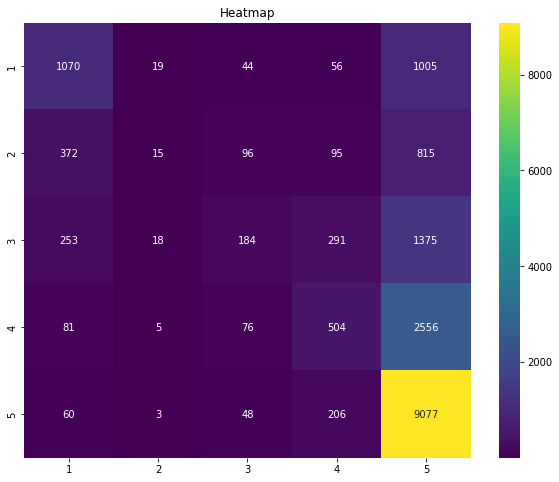

In [ ]:
# Results
Report_Model(y_test, y_pred)

**Solving Class Imbalance**

In [ ]:
# Oversampling using SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfid, y_train)

In [ ]:
# Classification
y_pred = XGBoostClass(X_train_smote, X_test_tfid, y_train_smote, y_test, )


Classification Report

              precision    recall  f1-score   support

           1       0.35      0.70      0.47      2194
           2       0.21      0.27      0.23      1393
           3       0.32      0.21      0.26      2121
           4       0.34      0.37      0.35      3222
           5       0.80      0.62      0.70      9394

    accuracy                           0.51     18324
   macro avg       0.40      0.43      0.40     18324
weighted avg       0.57      0.51      0.52     18324





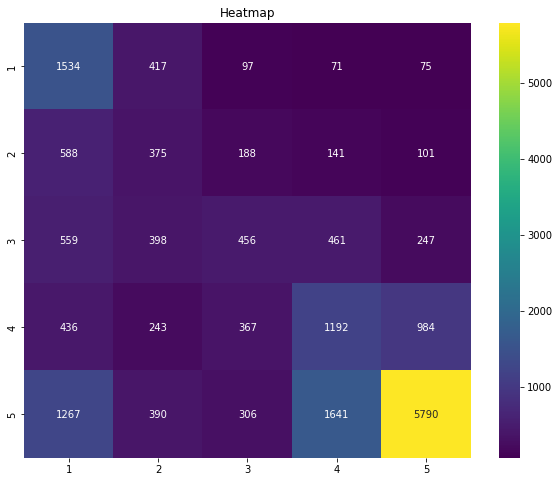

In [ ]:
# Results
Report_Model(y_test, y_pred)

Performance drops with oversampling.

**Hyperparameter Tuning**

In [ ]:
# Hyperparameters
params = {'max_depth': [3, 6, 10, 15], 
          'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4], 
          'subsample': np.arange(0.5, 1.0, 0.1), 
          'colsample_bytree': np.arange(0.5, 1.0, 0.1), 
          'colsample_bylevel': np.arange(0.5, 1.0, 0.1), 
          'n_estimators': [100, 250, 500, 750]
              
    }

In [ ]:
# Randomized Search
estimator = xgb.XGBClassifier()
rsearch = RandomizedSearchCV(estimator, params,  scoring= 'average_precision',
                   n_jobs= -1, cv= 5, verbose= 2, 
                   random_state= 100)
rsearch.fit(X_train_tfid, y_train)
rsearch.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'colsample_bylevel': 0.7,
 'colsample_bytree': 0.8999999999999999,
 'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 100,
 'subsample': 0.5}

In [ ]:
# Classifcation function
def XGBoostClassTuned(X_train, X_test, y_train, y_test, max_depth, learning_rate,
                 subsample, colsample_bytree, colsample_bylevel, n_estimators):
  classifier = xgb.XGBClassifier(max_depth = max_depth,
                                 learning_rate = learning_rate, 
                                 subsample = subsample,
                                 colsample_bytree = colsample_bytree, 
                                 colsample_bylevel = colsample_bylevel, 
                                 n_estimators = n_estimators)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  Report_Model(y_test, y_pred)


Classification Report

              precision    recall  f1-score   support

           1       0.57      0.48      0.52      2194
           2       0.40      0.03      0.05      1393
           3       0.40      0.12      0.18      2121
           4       0.44      0.14      0.21      3222
           5       0.61      0.96      0.75      9394

    accuracy                           0.59     18324
   macro avg       0.49      0.35      0.34     18324
weighted avg       0.54      0.59      0.51     18324





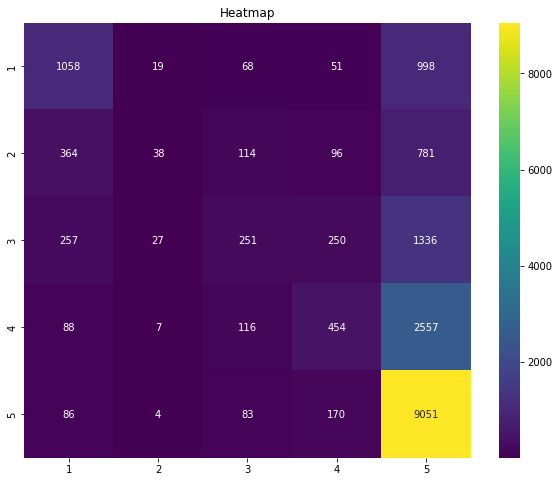

In [ ]:
# Implementing best parameters
XGBoostClassTuned(X_train_tfid, X_test_tfid, y_train, y_test, max_depth=10, learning_rate=0.01,
                 subsample=0.5, colsample_bytree=0.8999999999999999, colsample_bylevel=0.7,
                  n_estimators=100)

### BERT Base Model

#### Importing Dependencies

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 65.2 MB/s 
     |████████████████████████████████| 6.6 MB 32.2 MB/s 
     |████████████████████████████████| 101 kB 10.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# Imports
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from sklearn.model_selection import train_test_split

#### Model

In [ ]:
# Tokenizer
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

#### Sentiment Analysis

In [ ]:
# Sentiment scores
def SentimentScore(text):
  model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
  # Tokens
  tokens = tokenizer.encode(text, return_tensors = 'pt', truncation = True, 
                            max_length = 512)
  # Model
  scores = model(tokens)
  return int(torch.argmax(scores.logits)) + 1

In [ ]:
# Load data
absa = pd.read_csv('absa.csv')
absa['BERT_Sentiments'] = ''
copy = absa.to_csv('copy.csv')

In [ ]:
# loading copy
copy = pd.read_csv('copy.csv')

In [ ]:
# Preview
copy.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,...,unixReviewTime,Item,Rating,Timestamp,brand,cleanedReview,cleanedReviewTagged,cleanedReviewLemmatized,ABSA,BERT_Sentiments
0,0,0,0,5,True,"09 25, 2015",A3DDWDH9PX2YX2,B00J8WZBEG,Sonja Lau,Simply and elegant! Love it!,...,1443139200,7106116521,2.0,1411862400,Unknown,Simply and elegant Love it,"[('Simply', 'n'), ('elegant', 'a'), ('Love', '...",Simply elegant Love,"{'aspect': 'Love', 'description': 'Simply eleg...",NaN
1,1,1,1,5,True,"09 25, 2015",A3DDWDH9PX2YX2,B00J8WZBEG,Sonja Lau,Simply and elegant! Love it!,...,1443139200,B00J8WZBEG,5.0,1443139200,Unknown,Simply and elegant Love it,"[('Simply', 'n'), ('elegant', 'a'), ('Love', '...",Simply elegant Love,"{'aspect': 'Love', 'description': 'Simply eleg...",NaN
2,2,2,2,5,True,"02 15, 2017",A29HLOUW0NS0EH,B01AQW1XI4,Patricia R. Erwin,Just what I wanted.,...,1487116800,7106116521,5.0,1405728000,TOFL,Just what I wanted,"[('wanted', 'v')]",want,"{'aspect': '', 'description': ''}",NaN
3,3,3,3,5,True,"02 15, 2017",A29HLOUW0NS0EH,B01AQW1XI4,Patricia R. Erwin,Just what I wanted.,...,1487116800,B01AQW1XI4,5.0,1487116800,TOFL,Just what I wanted,"[('wanted', 'v')]",want,"{'aspect': '', 'description': ''}",NaN
4,4,4,4,5,True,"07 26, 2016",A2JQ5SR88NQX8P,B01AQW1XI4,N. Rosario,"These shoelaces look very nice, they're at a g...",...,1469491200,B00062NHH0,5.0,1426032000,TOFL,These shoelaces look very nice they re at a go...,"[('shoelaces', 'n'), ('look', 'v'), ('nice', '...",shoelace look nice good price fast shipping,"{'aspect': 'shipping', 'description': 'fast'}",NaN


In [ ]:
# Sampling
stratified_copy = copy.groupby('overall', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.01))
# Reset index
stratified_copy = stratified_copy.iloc[:, 3:]
stratified_copy.reset_index(drop = True, inplace = True)
stratified_copy.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,Item,Rating,Timestamp,brand,cleanedReview,cleanedReviewTagged,cleanedReviewLemmatized,ABSA,BERT_Sentiments
0,1,True,"09 25, 2016",A1OPM99N8DTXA1,B00FAD21NQ,Mae Godwin,"Its way bigger than I expected, the shape isn'...","Its way bigger than I expected, the shape isn'...",1474761600,B01H50Q51U,2.0,1489536000,Scarleton,Its way bigger than I expected the shape isn t...,"[('way', 'n'), ('bigger', 'a'), ('expected', '...",way big expect shape trapezoid think buckle ...,"{'aspect': 'accent', 'description': 'many'}",NaN
1,1,True,"03 8, 2015",A1NI7LI1TNOE90,B00OFHLL6Q,LaShana Malone,Too small and no return paper.,One Star,1425772800,B00OFHLL6Q,1.0,1425772800,Amoin,Too small and no return paper,"[('small', 'a'), ('return', 'n'), ('paper', 'n')]",small return paper,"{'aspect': 'paper', 'description': 'small'}",NaN
2,1,True,"11 10, 2015",A2XX442WITXQJ0,B00XD1IVWC,Amazon Customer,When I received this dress I just knew it was ...,Be cautious when ordering from this company,1447113600,B00XD1IVWC,1.0,1447113600,Arctic Leaf,When I received this dress I just knew it was ...,"[('received', 'v'), ('dress', 'n'), ('knew', '...",receive dress know joke order large safe sid...,"{'aspect': 'Needless', 'description': 'right'}",NaN
3,1,True,"12 26, 2014",A30KQ2IUAPVW8A,B00N7BMSC2,Monica Brome,Noting like what i expected. material is very...,Very Cheep Finish,1419552000,B00N7BMSC2,1.0,1419552000,Abody,Noting like what i expected material is very c...,"[('Noting', 'v'), ('like', None), ('expected',...",Noting like expect material cheep disappointed,"{'aspect': 'cheep', 'description': ''}",NaN
4,1,True,"10 7, 2016",A30C73QN3XO1AB,B013W9WA5S,SBrooks,The construction is terrible. It easily unrave...,Sloppy sewing-Loose Thread Everywhere,1475798400,B013W9WA5S,1.0,1475798400,Deardresses,The construction is terrible It easily unravel...,"[('construction', 'n'), ('terrible', 'a'), ('e...",construction terrible easily unravels thread...,"{'aspect': 'snap', 'description': 'loose'}",NaN


In [ ]:
# Resulting shape
stratified_copy.shape

(9163, 18)

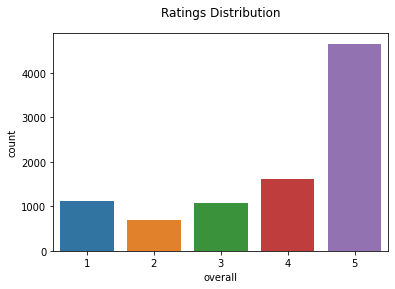

In [ ]:
# Preview of ratings distribution
sns.countplot(data = stratified_copy, x = 'overall')
plt.title('Ratings Distribution', y = 1.05)
plt.show()

The original distribution is mainatined.

In [ ]:
# Sentiments scores
stratified_copy['BERT_Sentiments'] = ''
row = 0
for text in stratified_copy['reviewText']:
  stratified_copy.loc[row, 'BERT_Sentiments'] = SentimentScore(text)
  row += 1

In [ ]:
stratified_copy = copy.to_csv('bert_stratified.csv')

In [ ]:
strat  =pd.read_csv('bert_stratified.csv')

In [ ]:
strat.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,overall,verified,reviewTime,reviewerID,asin,reviewerName,...,unixReviewTime,Item,Rating,Timestamp,brand,cleanedReview,cleanedReviewTagged,cleanedReviewLemmatized,ABSA,BERT_Sentiments
0,0,0,0,0,5,True,"09 25, 2015",A3DDWDH9PX2YX2,B00J8WZBEG,Sonja Lau,...,1443139200,7106116521,2.0,1411862400,Unknown,Simply and elegant Love it,"[('Simply', 'n'), ('elegant', 'a'), ('Love', '...",Simply elegant Love,"{'aspect': 'Love', 'description': 'Simply eleg...",NaN
1,1,1,1,1,5,True,"09 25, 2015",A3DDWDH9PX2YX2,B00J8WZBEG,Sonja Lau,...,1443139200,B00J8WZBEG,5.0,1443139200,Unknown,Simply and elegant Love it,"[('Simply', 'n'), ('elegant', 'a'), ('Love', '...",Simply elegant Love,"{'aspect': 'Love', 'description': 'Simply eleg...",NaN
2,2,2,2,2,5,True,"02 15, 2017",A29HLOUW0NS0EH,B01AQW1XI4,Patricia R. Erwin,...,1487116800,7106116521,5.0,1405728000,TOFL,Just what I wanted,"[('wanted', 'v')]",want,"{'aspect': '', 'description': ''}",NaN
3,3,3,3,3,5,True,"02 15, 2017",A29HLOUW0NS0EH,B01AQW1XI4,Patricia R. Erwin,...,1487116800,B01AQW1XI4,5.0,1487116800,TOFL,Just what I wanted,"[('wanted', 'v')]",want,"{'aspect': '', 'description': ''}",NaN
4,4,4,4,4,5,True,"07 26, 2016",A2JQ5SR88NQX8P,B01AQW1XI4,N. Rosario,...,1469491200,B00062NHH0,5.0,1426032000,TOFL,These shoelaces look very nice they re at a go...,"[('shoelaces', 'n'), ('look', 'v'), ('nice', '...",shoelace look nice good price fast shipping,"{'aspect': 'shipping', 'description': 'fast'}",NaN


In [ ]:
bt = pd.read_csv('bert.csv')
bt.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,overall,verified,reviewTime,reviewerID,asin,reviewerName,...,unixReviewTime,Item,Rating,Timestamp,brand,cleanedReview,cleanedReviewTagged,cleanedReviewLemmatized,ABSA,BERT_Sentiments
0,0,0,0,0,5,True,"09 25, 2015",A3DDWDH9PX2YX2,B00J8WZBEG,Sonja Lau,...,1443139200,7106116521,2.0,1411862400,Unknown,Simply and elegant Love it,"[('Simply', 'n'), ('elegant', 'a'), ('Love', '...",Simply elegant Love,"{'aspect': 'Love', 'description': 'Simply eleg...",5.0
1,1,1,1,1,5,True,"09 25, 2015",A3DDWDH9PX2YX2,B00J8WZBEG,Sonja Lau,...,1443139200,B00J8WZBEG,5.0,1443139200,Unknown,Simply and elegant Love it,"[('Simply', 'n'), ('elegant', 'a'), ('Love', '...",Simply elegant Love,"{'aspect': 'Love', 'description': 'Simply eleg...",5.0
2,2,2,2,2,5,True,"02 15, 2017",A29HLOUW0NS0EH,B01AQW1XI4,Patricia R. Erwin,...,1487116800,7106116521,5.0,1405728000,TOFL,Just what I wanted,"[('wanted', 'v')]",want,"{'aspect': '', 'description': ''}",5.0
3,3,3,3,3,5,True,"02 15, 2017",A29HLOUW0NS0EH,B01AQW1XI4,Patricia R. Erwin,...,1487116800,B01AQW1XI4,5.0,1487116800,TOFL,Just what I wanted,"[('wanted', 'v')]",want,"{'aspect': '', 'description': ''}",5.0
4,4,4,4,4,5,True,"07 26, 2016",A2JQ5SR88NQX8P,B01AQW1XI4,N. Rosario,...,1469491200,B00062NHH0,5.0,1426032000,TOFL,These shoelaces look very nice they re at a go...,"[('shoelaces', 'n'), ('look', 'v'), ('nice', '...",shoelace look nice good price fast shipping,"{'aspect': 'shipping', 'description': 'fast'}",5.0


In [ ]:
bt_drp = bt.dropna()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix



Classification Report

              precision    recall  f1-score   support

           1       0.60      0.55      0.58       217
           2       0.27      0.50      0.35       156
           3       0.40      0.54      0.46       331
           4       0.32      0.50      0.39       631
           5       0.95      0.81      0.87      4030

    accuracy                           0.74      5365
   macro avg       0.51      0.58      0.53      5365
weighted avg       0.80      0.74      0.76      5365





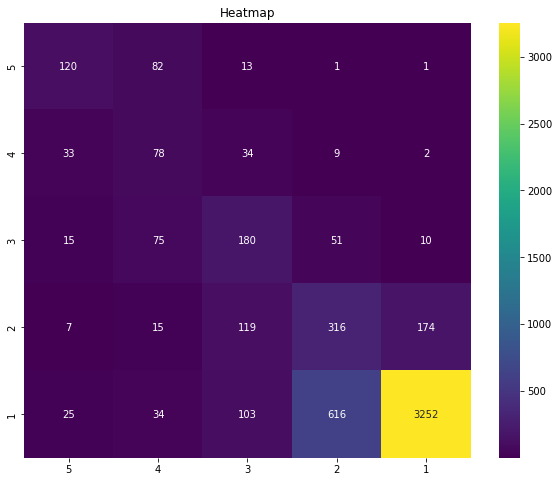

In [ ]:
# Results
Report('overall', 'BERT_Sentiments', bt_drp)

Use of the BERT model leads to higher precision and accuracy scores.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Combining sentiments 
def SentimentGrouping(column1, column2, data):
  # Negative sentiment
  data.loc[data[column1] < 3, column2] = 0
  # Neutral sentiment
  data.loc[data[column1] == 3, column2] = 1
  # Positive sentiment
  data.loc[data[column1] > 3, column2] = 2



In [ ]:
# Rating sentiments
bt_drp['grouped_sentiments'] = 0
SentimentGrouping('overall', 'grouped_sentiments', bt_drp)
# BERT sentiments
bt_drp['bert_grouped_sentiments'] = 0
SentimentGrouping('BERT_Sentiments', 'bert_grouped_sentiments', bt_drp)


In [ ]:
# Previewing changes
bt_drp.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,overall,verified,reviewTime,reviewerID,asin,reviewerName,...,Rating,Timestamp,brand,cleanedReview,cleanedReviewTagged,cleanedReviewLemmatized,ABSA,BERT_Sentiments,grouped_sentiments,bert_grouped_sentiments
0,0,0,0,0,5,True,"09 25, 2015",A3DDWDH9PX2YX2,B00J8WZBEG,Sonja Lau,...,2.0,1411862400,Unknown,Simply and elegant Love it,"[('Simply', 'n'), ('elegant', 'a'), ('Love', '...",Simply elegant Love,"{'aspect': 'Love', 'description': 'Simply eleg...",5.0,2,2
1,1,1,1,1,5,True,"09 25, 2015",A3DDWDH9PX2YX2,B00J8WZBEG,Sonja Lau,...,5.0,1443139200,Unknown,Simply and elegant Love it,"[('Simply', 'n'), ('elegant', 'a'), ('Love', '...",Simply elegant Love,"{'aspect': 'Love', 'description': 'Simply eleg...",5.0,2,2
2,2,2,2,2,5,True,"02 15, 2017",A29HLOUW0NS0EH,B01AQW1XI4,Patricia R. Erwin,...,5.0,1405728000,TOFL,Just what I wanted,"[('wanted', 'v')]",want,"{'aspect': '', 'description': ''}",5.0,2,2
3,3,3,3,3,5,True,"02 15, 2017",A29HLOUW0NS0EH,B01AQW1XI4,Patricia R. Erwin,...,5.0,1487116800,TOFL,Just what I wanted,"[('wanted', 'v')]",want,"{'aspect': '', 'description': ''}",5.0,2,2
4,4,4,4,4,5,True,"07 26, 2016",A2JQ5SR88NQX8P,B01AQW1XI4,N. Rosario,...,5.0,1426032000,TOFL,These shoelaces look very nice they re at a go...,"[('shoelaces', 'n'), ('look', 'v'), ('nice', '...",shoelace look nice good price fast shipping,"{'aspect': 'shipping', 'description': 'fast'}",5.0,2,2



Classification Report

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       373
           1       0.40      0.54      0.46       331
           2       0.98      0.93      0.96      4661

    accuracy                           0.90      5365
   macro avg       0.68      0.77      0.72      5365
weighted avg       0.92      0.90      0.91      5365





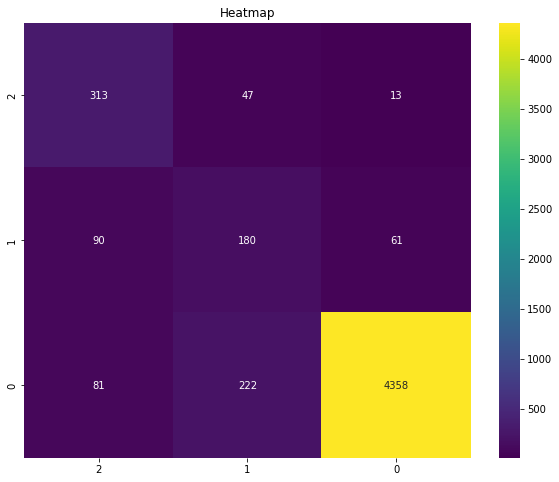

In [ ]:
# Results
Report('grouped_sentiments', 'bert_grouped_sentiments', bt_drp)

After merging the sentiments into positive, negative and neutral, the BERT model accuracy becomes 90%, and the precision scores improve.

#### Fine-Tuning the BERT Model

##### Tokenization

In [ ]:
# Tokenizer
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment', do_lower_case = True)
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment', num_labels=5, problem_type="multi_label_classification")

##### Training Hyperparameters

In [ ]:
from transformers import TrainingArguments, Trainer

In [ ]:
# Training arguments
training_arguments = TrainingArguments(output_dir = '.',
                                       evaluation_strategy = 'epoch')

In [ ]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##### Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Preprocess data
X = list(stratified_copy["reviewText"])
y = stratified_copy["overall"].astype('float64').values.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
# Mutlilabelbinarizer
mlb = MultiLabelBinarizer()
ymlb = (mlb.fit_transform(y)).tolist()
type(ymlb[0][0])

int

In [ ]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, ymlb, test_size=0.1)

##### Tokenization

In [ ]:
# X_train
X_train_tokenized = tokenizer(
      X_train, # Reviews
      max_length = 512, # Padding and truncation
      truncation = True,
      padding = 'max_length'
  )

# X_test
X_test_tokenized = tokenizer(
      X_test, # Reviews
      max_length = 512, # Padding and truncation
      truncation = True,
      padding = 'max_length'
  )

##### Creating a Pytorch dataset

In [ ]:
# Custom dataset class
class Dataset(torch.utils.data.Dataset):
    def __init__(self, tokens, labels):
        self.tokens = tokens
        self.labels = labels
    
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.tokens.items()}
        item["labels"] = torch.tensor(self.labels[idx]).float()
        return item

    

In [ ]:
train_dataset = Dataset(X_train_tokenized, y_train)
test_dataset = Dataset(X_test_tokenized, y_test)

In [ ]:
# Evaluation metric
from evaluate import load

In [ ]:
# Precision metric
metric = load('precision')

In [ ]:
# Computing metrics
def compute_metrics(evaluation_prediction):
  logits, labels = evaluation_prediction
  predictions = np.argmax(logits, axis = -1)
  return metric.compute(predictions = predictions, references = labels)

##### Trainer

In [ ]:
# Trainer object with the model, training arguments, training and test datasets.
# and the evaluation function
trainer = Trainer(
    model = model,
    args = training_arguments,
    train_dataset = train_dataset,
    eval_dataset = test_dataset,
    compute_metrics = compute_metrics
)

In [ ]:
# Fine-tuning the model
trainer.train()

***** Running training *****
  Num examples = 8246
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 3093


Epoch,Training Loss,Validation Loss


### Maximum Sequence Length

In [ ]:
# Optimal maximum sequenct length
def MaxSequenceLength(text):
  # Text lengths
  lengths = []
  for text in reviews_cleaned.content:
    tokens = tokenizer.encode(text, max_length = 512)
    lengths.append(len(tokens))
  # Distribution plot
  sns.displot(lengths)
  plt.title('Maximum Sequence Length', y = 1.05)
  plt.xlabel('Token Count')
